Text(0.5, 1.0, 'NWA6_CT+LT-LT 2003-300 days La_turbulent_6_wave')

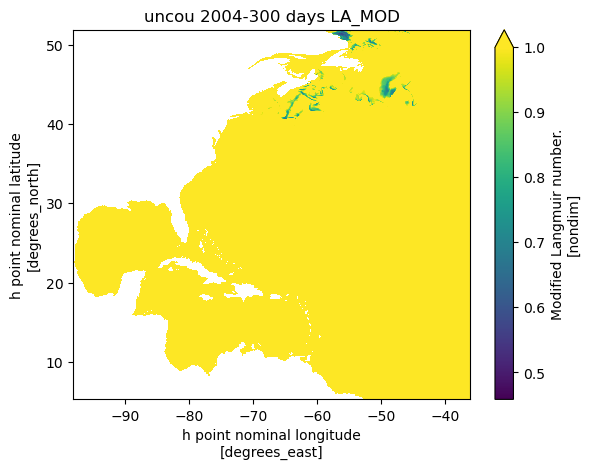

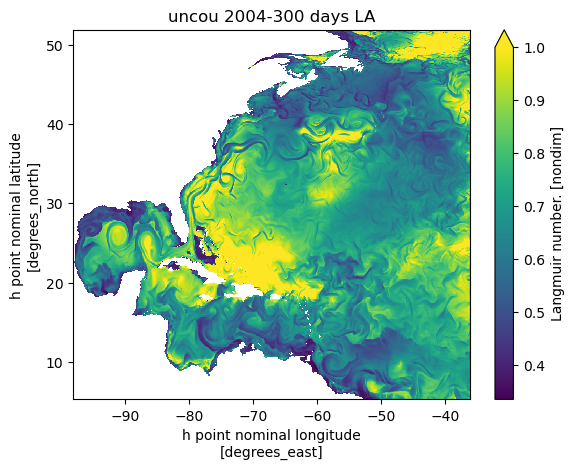

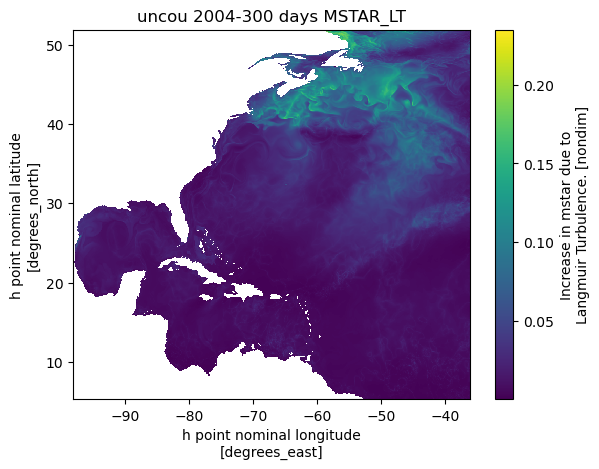

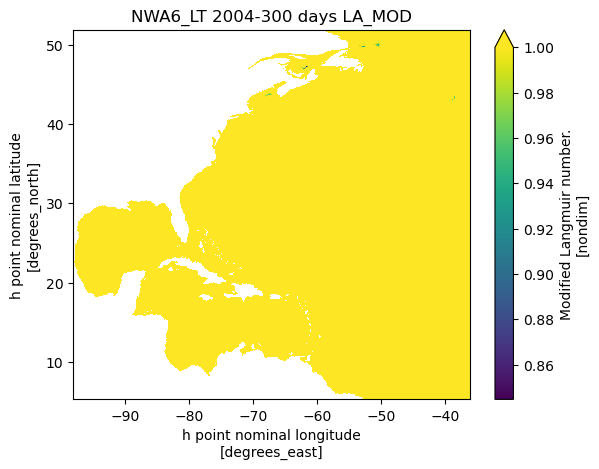

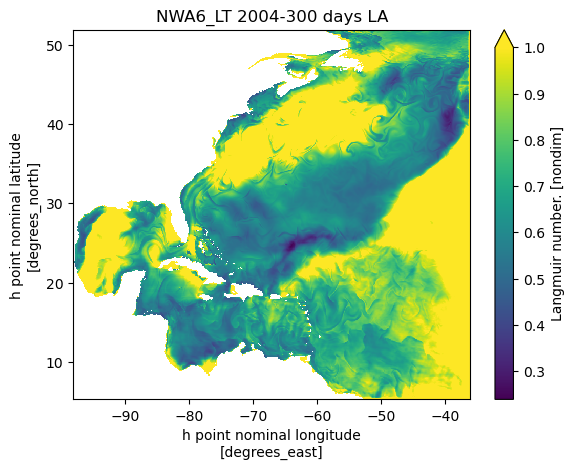

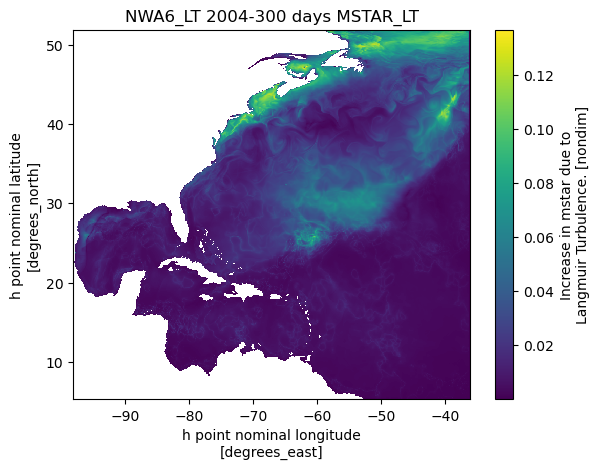

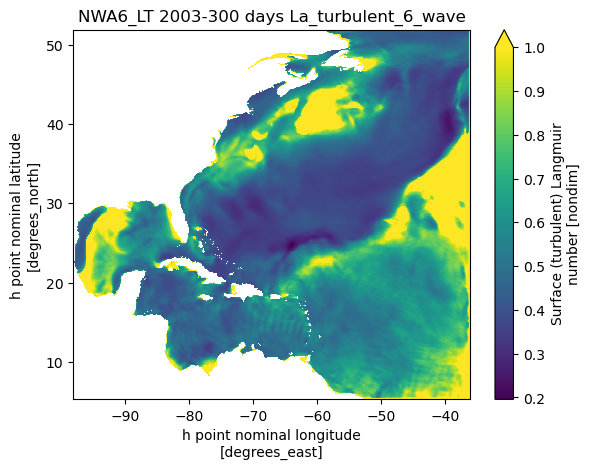

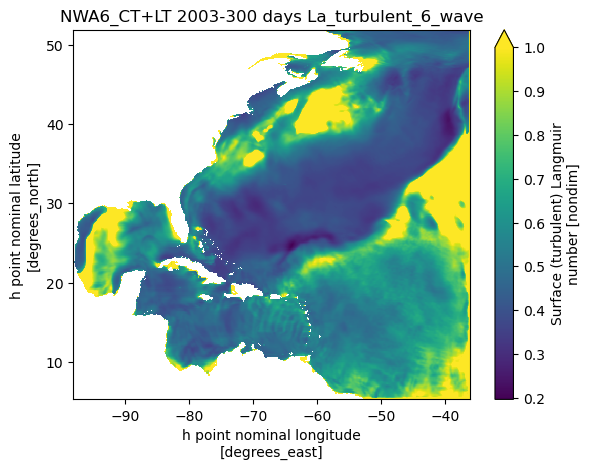

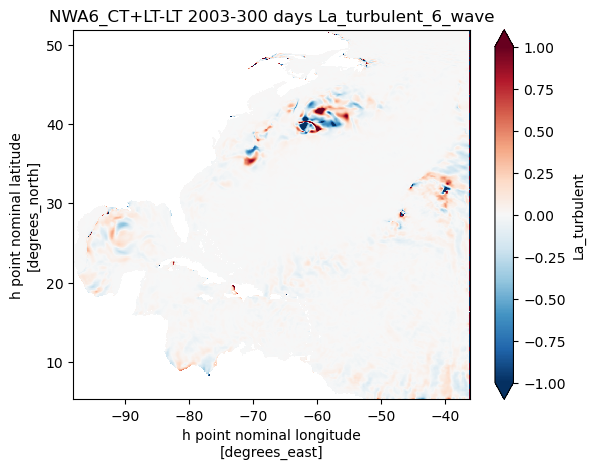

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray as xr
import os
import numpy as np
import logging
import cmocean
import copy

cmocean.cm.balance
cmap = copy.copy(cmocean.cm.balance)
cmap.set_bad('gray')   
###first verage every year and then concate

pp_root_uncou = "/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou/"
pp_root_uncou_LAfalse="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou_LALTFalse/"
pp_root_12_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave_all/"
pp_root_12_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave/"
pp_root_6_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_all/"
pp_root_6_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_wave/"
ocean_daily_uncou_1= xr.open_dataset(pp_root_uncou+"/20040101_results/20040101.ocean_daily.nc")
LA_MOD=ocean_daily_uncou_1['LA_MOD']
LA=ocean_daily_uncou_1['LA']
MSTAR_LT=ocean_daily_uncou_1['MSTAR_LT']
plt.figure()
LA_MOD[300,:,:].plot(vmax=1)
plt.title('uncou 2004-300 days LA_MOD')
plt.figure()
LA[300,:,:].plot(vmax=1)
plt.title('uncou 2004-300 days LA')
plt.figure()
MSTAR_LT[300,:,:].plot()
plt.title('uncou 2004-300 days MSTAR_LT')

ocean_daily_6_wave_1= xr.open_dataset(pp_root_6_wave+"/20030701_results/20030701.ocean_daily.nc")
LA_MOD_6_wave=ocean_daily_6_wave_1['LA_MOD']
LA_6_wave=ocean_daily_6_wave_1['LA']
MSTAR_LT_6_wave=ocean_daily_6_wave_1['MSTAR_LT']
La_turbulent_6_wave=ocean_daily_6_wave_1['La_turbulent']
plt.figure()
LA_MOD_6_wave[118,:,:].plot(vmax=1)
plt.title('NWA6_LT 2004-300 days LA_MOD')
plt.figure()
LA_6_wave[118,:,:].plot(vmax=1)
plt.title('NWA6_LT 2004-300 days LA')
plt.figure()
MSTAR_LT_6_wave[118,:,:].plot()
plt.title('NWA6_LT 2004-300 days MSTAR_LT')

plt.figure()
La_turbulent_6_wave[118,:,:].plot(vmax=1)
plt.title('NWA6_LT 2003-300 days La_turbulent_6_wave')

ocean_daily_6_all_1= xr.open_dataset(pp_root_6_all+"/20030701_results/20030701.ocean_daily.nc")
La_turbulent_6_all=ocean_daily_6_all_1['La_turbulent']
plt.figure()
La_turbulent_6_all[118,:,:].plot(vmax=1)

plt.title('NWA6_CT+LT 2003-300 days La_turbulent_6_wave')
diff=La_turbulent_6_all[118,:,:]-La_turbulent_6_wave[118,:,:]
plt.figure()
diff.plot(vmax=1)

plt.title('NWA6_CT+LT-LT 2003-300 days La_turbulent_6_wave')

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray as xr
import os
import numpy as np
import logging
import cmocean
import copy

cmocean.cm.balance
cmap = copy.copy(cmocean.cm.balance)
cmap.set_bad('gray')   
###first verage every year and then concate

pp_root_uncou = "/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou/"
pp_root_uncou_LAfalse="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/postProcessing/NWA12.COBALTuncou_LALTFalse/"
pp_root_12_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave_all/"
pp_root_12_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_wave/"
pp_root_6_all="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_all/"
pp_root_6_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c6/postProcessing/NWA12_6_wave/"
def read_and_extract_data_point(pp_root, data_list, variables,x_coord,y_coord):
    combined_data = {}
    summer_data = {}
    winter_data = {}

    for var_name in variables:
        datasets = []
        summer_data_list = []
        winter_data_list = []

        for file_path in data_list:
            file_path = os.path.join(pp_root, file_path)
            if os.path.exists(file_path):
                try:
                    ds = xr.open_dataset(file_path)
                    if var_name in ds:
                        
                      
                        
                        wave_time = ds[var_name].sel(xh=x_coord, yh=y_coord, method="nearest")
                        exact_xh = wave_time.xh.values
                        exact_yh = wave_time.yh.values
                        datasets.append(wave_time)
                        
                        # print(f"Exact xh: {exact_xh}, Exact yh: {exact_yh}")

                        # Summer: June, July, August (JJA)
                        summer = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
                        if not summer[var_name].isnull().all():
                            summer_mean = summer[var_name].sel(xh=x_coord, yh=y_coord, method="nearest")
                            exact_xh = wave_time.xh.values
                            exact_yh = wave_time.yh.values
                            
                            summer_data_list.append(summer_mean)

                        # Winter: December, January, February (DJF)
                        winter = ds.sel(time=ds['time'].dt.month.isin([12, 1, 2]))
                        if not winter[var_name].isnull().all():
                            winter_mean=winter[var_name].sel(xh=x_coord, yh=y_coord, method="nearest")
                            winter_data_list.append(winter_mean)

                    else:
                        print(f"Variable {var_name} not found in {file_path}")
                    ds.close()

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")

        # Combine along time dimension after the loop finishes
        combined_data[var_name] = xr.concat(datasets, dim='time') if datasets else None
        summer_data[var_name] = xr.concat(summer_data_list, dim='time') if summer_data_list else None
        winter_data[var_name] = xr.concat(winter_data_list, dim='time') if winter_data_list else None

    return combined_data, summer_data, winter_data
def read_and_extract_data_l5(pp_root, data_list, variables):

    selected_region = {}
    S_selected_region = {}
    W_selected_region = {}

    for var_name in variables:
        datasets = []
        summer_data_list = []
        winter_data_list = []
        region_masks = []  # To collect the masks where var_name <= 0.5
        region_masks_summer = []  # To collect the masks where var_name <= 0.5
        region_masks_winter = []  # To collect the masks where var_name <= 0.5

        for file_path in data_list:
            file_path = os.path.join(pp_root, file_path)
            if os.path.exists(file_path):
                try:
                    ds = xr.open_dataset(file_path)
                    if var_name in ds:
                        # filtered_data = ds[var_name].where(ds[var_name] <= 0.5, drop=True)
                        # if not filtered_data.isnull().all():
                        #     datasets.append(filtered_data)
                        mask = (ds[var_name] <= 0.5).any(dim='time')
                        region_masks.append(mask)
                        # Summer: June, July, August (JJA)
                        summer = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
                        # summer_filtered = summer[var_name].where(summer[var_name] <= 0.5, drop=True)
                        # if not summer_filtered.isnull().all():
                        #     summer_data_list.append(summer_filtered)
                        summer_mask = (summer[var_name] <= 0.5).any(dim='time')
                        region_masks_summer.append(summer_mask)

                        # Winter: December, January, February (DJF)
                        winter = ds.sel(time=ds['time'].dt.month.isin([12, 1, 2]))
                        # winter_filtered = winter[var_name].where(winter[var_name] <= 0.5, drop=True)
                        # if not winter_filtered.isnull().all():
                        #     winter_data_list.append(winter_filtered)
                        winter_mask = (winter[var_name] <= 0.5).any(dim='time')
                        region_masks_winter.append(winter_mask)
                    else:
                        print(f"Variable {var_name} not found in {file_path}")
                    ds.close()

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")
                
        if region_masks:
            selected_region[var_name] = xr.concat(region_masks, dim='time').any(dim='time')
        else:
            selected_region[var_name] = None
            
        if region_masks_summer:
            S_selected_region[var_name] = xr.concat(region_masks_summer, dim='time').any(dim='time')
        else:
            S_selected_region[var_name] = None
            
        if region_masks_winter:
            W_selected_region[var_name] = xr.concat(region_masks_winter, dim='time').any(dim='time')
        else:
            W_selected_region[var_name] = None

    return selected_region, S_selected_region, W_selected_region

Ddata_list = [
    '19930101_results/19930101.ocean_daily.nc',
    '19930701_results/19930701.ocean_daily.nc',
    '19940101_results/19940101.ocean_daily.nc',
    '19940701_results/19940701.ocean_daily.nc',
    '19950101_results/19950101.ocean_daily.nc',
    '19950701_results/19950701.ocean_daily.nc',
    '19960101_results/19960101.ocean_daily.nc',
    '19970101_results/19970101.ocean_daily.nc',
    '19980101_results/19980101.ocean_daily.nc',
    '19990101_results/19990101.ocean_daily.nc',
    '20000101_results/20000101.ocean_daily.nc',
    '20010101_results/20010101.ocean_daily.nc',
    '20020101_results/20020101.ocean_daily.nc',
    '20030101_results/20030101.ocean_daily.nc',
    '20040101_results/20040101.ocean_daily.nc',
    '20050101_results/20050101.ocean_daily.nc',
    '20060101_results/20060101.ocean_daily.nc',
    '20070101_results/20070101.ocean_daily.nc',
    '20080101_results/20080101.ocean_daily.nc',
    '20090101_results/20090101.ocean_daily.nc',
    '20100101_results/20100101.ocean_daily.nc',
    '20110101_results/20110101.ocean_daily.nc',
    '20120101_results/20120101.ocean_daily.nc',
    '20130101_results/20130101.ocean_daily.nc',
    '20140101_results/20140101.ocean_daily.nc',
    '20150101_results/20150101.ocean_daily.nc',
    '20160101_results/20160101.ocean_daily.nc',
    '20170101_results/20170101.ocean_daily.nc',
    '20180101_results/20180101.ocean_daily.nc',
    '20190101_results/20190101.ocean_daily.nc',
    '20200101_results/20200101.ocean_daily.nc',
    '20210101_results/20210101.ocean_daily.nc',
    '20220101_results/20220101.ocean_daily.nc',

]
Mdata_list = [
    '19930101_results/19930101.ocean_month.nc',
    '19930701_results/19930701.ocean_month.nc',
    '19940101_results/19940101.ocean_month.nc',
    '19940701_results/19940701.ocean_month.nc',
    '19950101_results/19950101.ocean_month.nc',
    '19950701_results/19950701.ocean_month.nc',
    '19960101_results/19960101.ocean_month.nc',
    '19970101_results/19970101.ocean_month.nc',
    '19980101_results/19980101.ocean_month.nc',
    '19990101_results/19990101.ocean_month.nc',
    '20000101_results/20000101.ocean_month.nc',
    '20010101_results/20010101.ocean_month.nc',
    '20020101_results/20020101.ocean_month.nc',
    '20030101_results/20030101.ocean_month.nc',
    '20040101_results/20040101.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',

]
WMdata_list = [
    '19930101_results/19930101.ocean_month.nc',
    '19930701_results/19930701.ocean_month.nc',
    '19940101_results/19940101.ocean_month.nc',
    '19940701_results/19940701.ocean_month.nc',
    '19950101_results/19950101.ocean_month.nc',
    '19950701_results/19950701.ocean_month.nc',
    '19960101_results/19960101.ocean_month.nc',
    '19960701_results/19960701.ocean_month.nc',
    '19970101_results/19970101.ocean_month.nc',
    '19970701_results/19970701.ocean_month.nc',
    '19980101_results/19980101.ocean_month.nc',
    '19980701_results/19980701.ocean_month.nc',
    '19990101_results/19990101.ocean_month.nc',
    '19990701_results/19990701.ocean_month.nc',
    '20000101_results/20000101.ocean_month.nc',
    '20000701_results/20000701.ocean_month.nc',
    '20010101_results/20010101.ocean_month.nc',
    '20010701_results/20010701.ocean_month.nc',
    '20020101_results/20020101.ocean_month.nc',
    '20020701_results/20020701.ocean_month.nc',
    '20030101_results/20030101.ocean_month.nc',
    '20030701_results/20030701.ocean_month.nc',
    '20040101_results/20040101.ocean_month.nc',
    '20040701_results/20040701.ocean_month.nc',
    '20050101_results/20050101.ocean_month.nc',
    '20050701_results/20050701.ocean_month.nc',
    '20060101_results/20060101.ocean_month.nc',
    '20060701_results/20060701.ocean_month.nc',
    '20070101_results/20070101.ocean_month.nc',
    '20070701_results/20070701.ocean_month.nc',
    '20080101_results/20080101.ocean_month.nc',
    '20080701_results/20080701.ocean_month.nc',
    '20090101_results/20090101.ocean_month.nc',
    '20090701_results/20090701.ocean_month.nc',
    '20100101_results/20100101.ocean_month.nc',
    '20100701_results/20100701.ocean_month.nc',
    '20110101_results/20110101.ocean_month.nc',
    '20110701_results/20110701.ocean_month.nc',
    '20120101_results/20120101.ocean_month.nc',
    '20120701_results/20120701.ocean_month.nc',
    '20130101_results/20130101.ocean_month.nc',
    '20130701_results/20130701.ocean_month.nc',
    '20140101_results/20140101.ocean_month.nc',
    '20140701_results/20140701.ocean_month.nc',
    '20150101_results/20150101.ocean_month.nc',
    '20150701_results/20150701.ocean_month.nc',
    '20160101_results/20160101.ocean_month.nc',
    '20160701_results/20160701.ocean_month.nc',
    '20170101_results/20170101.ocean_month.nc',
    '20170701_results/20170701.ocean_month.nc',
    '20180101_results/20180101.ocean_month.nc',
    '20180701_results/20180701.ocean_month.nc',
    '20190101_results/20190101.ocean_month.nc',
    '20190701_results/20190701.ocean_month.nc',
    '20200101_results/20200101.ocean_month.nc',
    '20200701_results/20200701.ocean_month.nc',
    '20210101_results/20210101.ocean_month.nc',
    '20210701_results/20210701.ocean_month.nc',
    '20220101_results/20220101.ocean_month.nc',
    '20220701_results/20220701.ocean_month.nc',
]

WDdata_list = [
    '19930101_results/19930101.ocean_daily.nc',
    '19930701_results/19930701.ocean_daily.nc',
    '19940101_results/19940101.ocean_daily.nc',
    '19940701_results/19940701.ocean_daily.nc',
    '19950101_results/19950101.ocean_daily.nc',
    '19950701_results/19950701.ocean_daily.nc',
    '19960101_results/19960101.ocean_daily.nc',
    '19960701_results/19960701.ocean_daily.nc',
    '19970101_results/19970101.ocean_daily.nc',
    '19970701_results/19970701.ocean_daily.nc',
    '19980101_results/19980101.ocean_daily.nc',
    '19980701_results/19980701.ocean_daily.nc',
    '19990101_results/19990101.ocean_daily.nc',
    '19990701_results/19990701.ocean_daily.nc',
    '20000101_results/20000101.ocean_daily.nc',
    '20000701_results/20000701.ocean_daily.nc',
    '20010101_results/20010101.ocean_daily.nc',
    '20010701_results/20010701.ocean_daily.nc',
    '20020101_results/20020101.ocean_daily.nc',
    '20020701_results/20020701.ocean_daily.nc',
    '20030101_results/20030101.ocean_daily.nc',
    '20030701_results/20030701.ocean_daily.nc',
    '20040101_results/20040101.ocean_daily.nc',
    '20040701_results/20040701.ocean_daily.nc',
    '20050101_results/20050101.ocean_daily.nc',
    '20050701_results/20050701.ocean_daily.nc',
    '20060101_results/20060101.ocean_daily.nc',
    '20060701_results/20060701.ocean_daily.nc',
    '20070101_results/20070101.ocean_daily.nc',
    '20070701_results/20070701.ocean_daily.nc',
    '20080101_results/20080101.ocean_daily.nc',
    '20080701_results/20080701.ocean_daily.nc',
    '20090101_results/20090101.ocean_daily.nc',
    '20090701_results/20090701.ocean_daily.nc',
    '20100101_results/20100101.ocean_daily.nc',
    '20100701_results/20100701.ocean_daily.nc',
    '20110101_results/20110101.ocean_daily.nc',
    '20110701_results/20110701.ocean_daily.nc',
    '20120101_results/20120101.ocean_daily.nc',
    '20120701_results/20120701.ocean_daily.nc',
    '20130101_results/20130101.ocean_daily.nc',
    '20130701_results/20130701.ocean_daily.nc',
    '20140101_results/20140101.ocean_daily.nc',
    '20140701_results/20140701.ocean_daily.nc',
    '20150101_results/20150101.ocean_daily.nc',
    '20150701_results/20150701.ocean_daily.nc',
    '20160101_results/20160101.ocean_daily.nc',
    '20160701_results/20160701.ocean_daily.nc',
    '20170101_results/20170101.ocean_daily.nc',
    '20170701_results/20170701.ocean_daily.nc',
    '20180101_results/20180101.ocean_daily.nc',
    '20180701_results/20180701.ocean_daily.nc',
    '20190101_results/20190101.ocean_daily.nc',
    '20190701_results/20190701.ocean_daily.nc',
    '20200101_results/20200101.ocean_daily.nc',
    '20200701_results/20200701.ocean_daily.nc',
    '20210101_results/20210101.ocean_daily.nc',
    '20210701_results/20210701.ocean_daily.nc',
    '20220101_results/20220101.ocean_daily.nc',
    '20220701_results/20220701.ocean_daily.nc',
]
variables_month = ['ssh','speed','MLD_EN1','LA','LA_MOD','MSTAR_LT','La_turbulent','surface_stokes_x','surface_stokes_y']
variables_daily = ['LA','LA_MOD','La_turbulent']

# Dcombined_data_uncou, Dsummer_data_uncou, Dwinter_data_uncou = read_and_extract_data(pp_root_uncou, Ddata_list, variables_daily)
# Mcombined_data_uncou, Msummer_data_uncou, Mwinter_data_uncou = read_and_extract_data(pp_root_uncou, Mdata_list, variables_month)

# Dcombined_data_6_wave, Dsummer_data_6_wave, Dwinter_data_6_wave = read_and_extract_data_l5(pp_root_6_wave, WDdata_list, variables_daily)
# # combined_data_6_wave, summer_data_6_wave, winter_data_6_wave = read_and_extract_data(pp_root_6_wave, WMdata_list, variables_month)

# Dcombined_data_6_all, Dsummer_data_6_all, Dwinter_data_6_all = read_and_extract_data_l5(pp_root_6_all, WDdata_list, variables_daily)
# # combined_data_6_all, summer_data_6_all, winter_data_6_all = read_and_extract_data(pp_root_6_all, WMdata_list, variables_month)


ocean_daily_uncou_1= xr.open_dataset(pp_root_uncou+"/19930101_results/19930101.ocean_daily.nc")
model_grid_x = ocean_daily_uncou_1.variables['xh']
model_grid_y = ocean_daily_uncou_1.variables['yh']



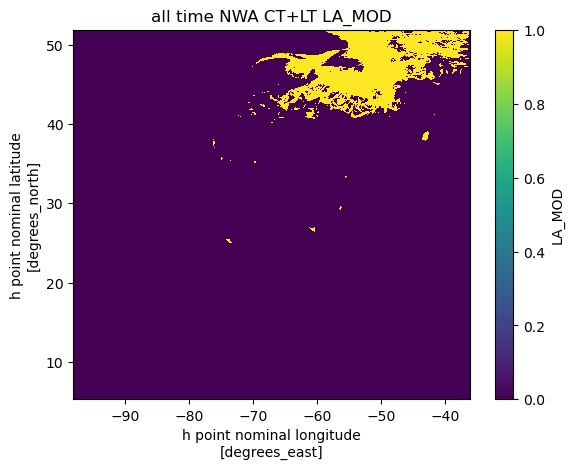

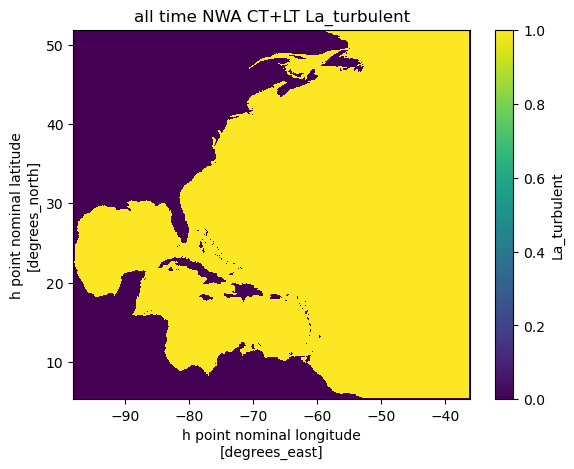

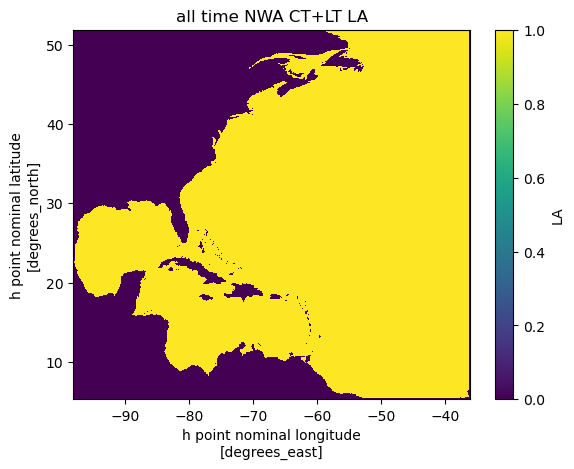

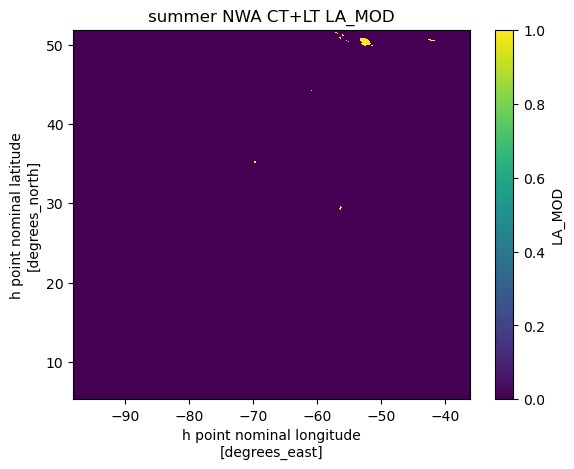

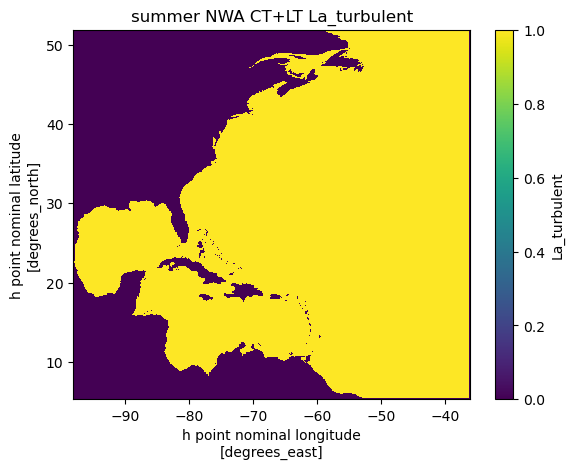

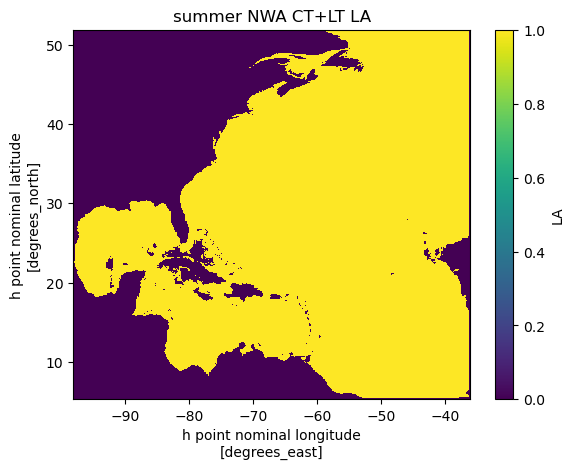

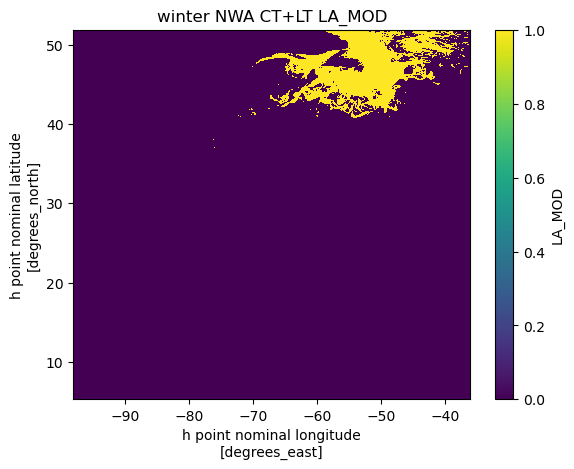

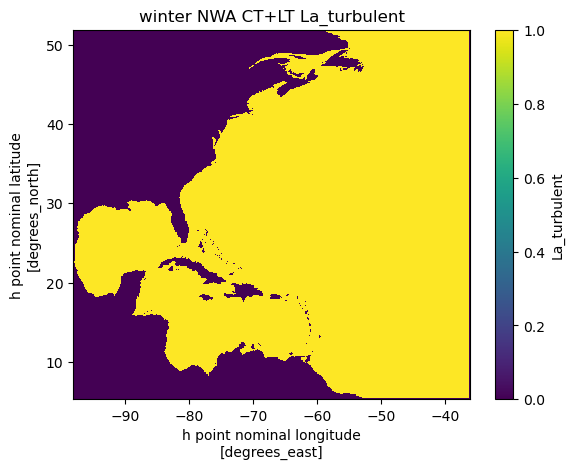

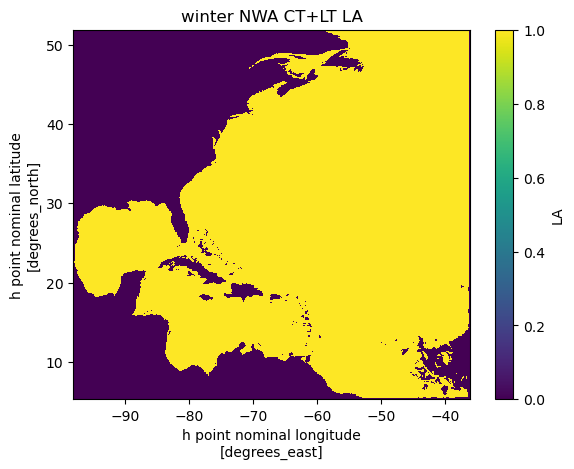

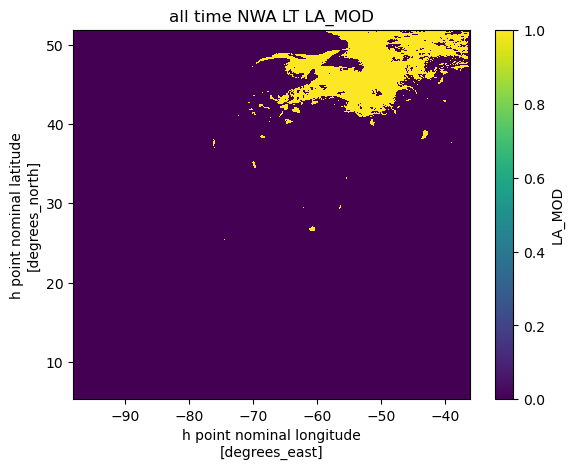

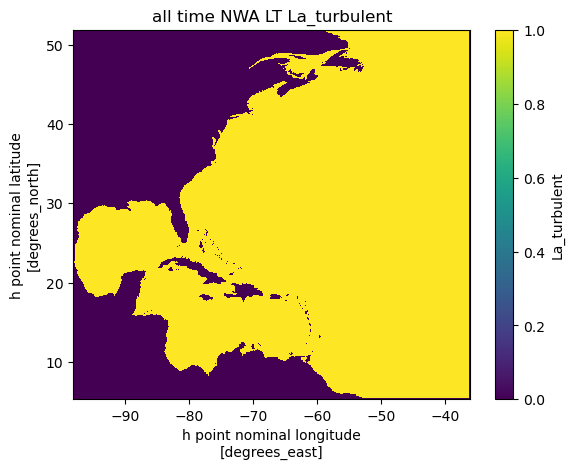

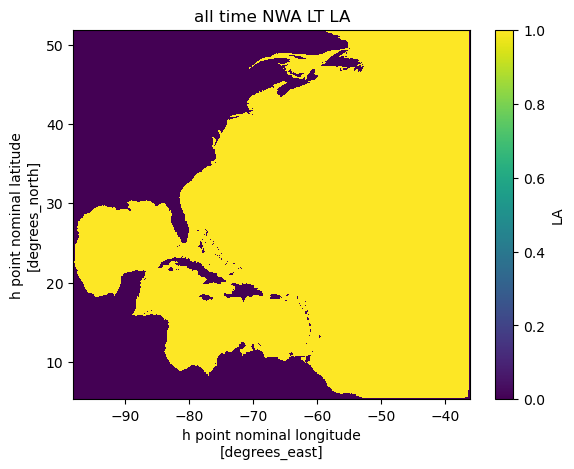

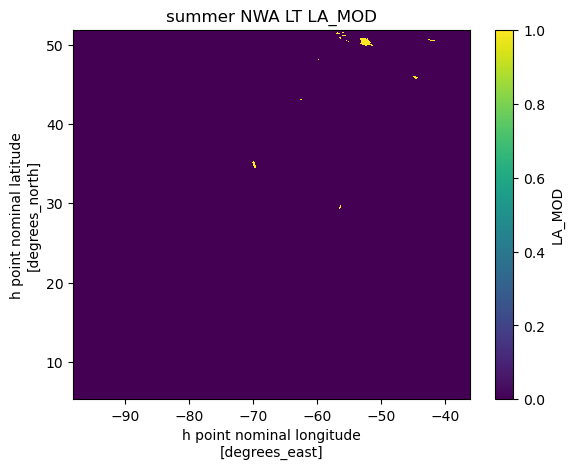

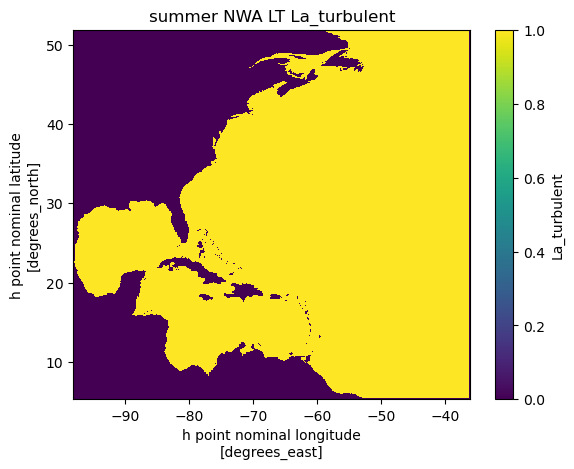

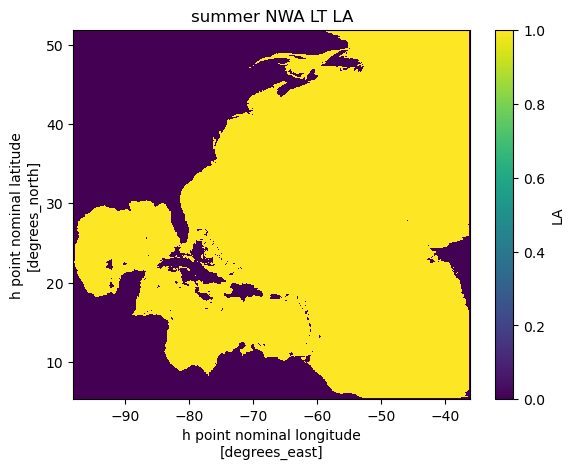

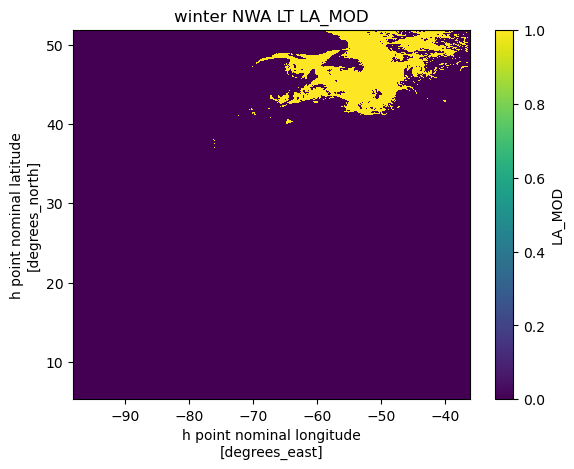

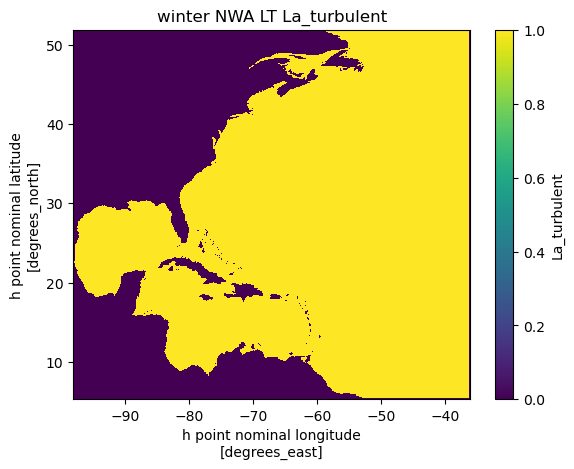

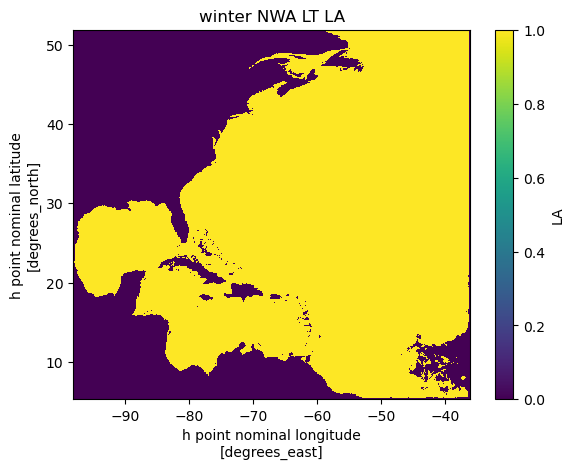

In [35]:
plt.figure
Dcombined_data_6_all['LA_MOD'].plot()
plt.title('all time NWA CT+LT LA_MOD')
plt.show()
plt.figure
Dcombined_data_6_all['La_turbulent'].plot()
plt.title('all time NWA CT+LT La_turbulent')
plt.show()
plt.figure
Dcombined_data_6_all['LA'].plot()
plt.title('all time NWA CT+LT LA')
plt.show()
plt.figure
Dsummer_data_6_all['LA_MOD'].plot()
plt.title('summer NWA CT+LT LA_MOD')
plt.show()
plt.figure
Dsummer_data_6_all['La_turbulent'].plot()
plt.title('summer NWA CT+LT La_turbulent')
plt.show()
plt.figure
Dsummer_data_6_all['LA'].plot()
plt.title('summer NWA CT+LT LA')
plt.show()
Dwinter_data_6_all['LA_MOD'].plot()
plt.title('winter NWA CT+LT LA_MOD')
plt.show()
plt.figure
Dwinter_data_6_all['La_turbulent'].plot()
plt.title('winter NWA CT+LT La_turbulent')
plt.show()
plt.figure
Dwinter_data_6_all['LA'].plot()
plt.title('winter NWA CT+LT LA')
plt.show()





plt.figure
Dcombined_data_6_wave['LA_MOD'].plot()
plt.title('all time NWA LT LA_MOD')
plt.show()
plt.figure
Dcombined_data_6_wave['La_turbulent'].plot()
plt.title('all time NWA LT La_turbulent')
plt.show()
plt.figure
Dcombined_data_6_wave['LA'].plot()
plt.title('all time NWA LT LA')
plt.show()
plt.figure
Dsummer_data_6_wave['LA_MOD'].plot()
plt.title('summer NWA LT LA_MOD')
plt.show()
plt.figure
Dsummer_data_6_wave['La_turbulent'].plot()
plt.title('summer NWA LT La_turbulent')
plt.show()
plt.figure
Dsummer_data_6_wave['LA'].plot()
plt.title('summer NWA LT LA')
plt.show()
Dwinter_data_6_wave['LA_MOD'].plot()
plt.title('winter NWA LT LA_MOD')
plt.show()
plt.figure
Dwinter_data_6_wave['La_turbulent'].plot()
plt.title('winter NWA LT La_turbulent')
plt.show()
plt.figure
Dwinter_data_6_wave['LA'].plot()
plt.title('winter NWA LT LA')
plt.show()

In [2]:
import numpy as np
from scipy.stats import gaussian_kde

x_coord=-50
y_coord=15
# variables_daily = ['LA','LA_MOD','La_turbulent','MSTAR_LT']
variables_daily = ['La_turbulent']
Pcombined_data_6_wave, Psummer_data_6_wave, Pwinter_data_6_wave = read_and_extract_data_point(pp_root_6_wave, WDdata_list, variables_daily,x_coord,y_coord)
# combined_data_6_wave, summer_data_6_wave, winter_data_6_wave = read_and_extract_data(pp_root_6_wave, WMdata_list, variables_month)

Pcombined_data_6_all, Psummer_data_6_all, Pwinter_data_6_all = read_and_extract_data_point(pp_root_6_all, WDdata_list, variables_daily,x_coord,y_coord)
# combined_data_6_all, summer_data_6_all, winter_data_6_all = read_and_extract_data(pp_root_6_all, WMdata_list, variables_month)








In [5]:
import numpy as np
from scipy.stats import gaussian_kde

x_coord=-50
y_coord=28
# variables_daily = ['LA','LA_MOD','La_turbulent','MSTAR_LT']
variables_daily = ['La_turbulent']
Pcombined_data_6_wave1, Psummer_data_6_wave1, Pwinter_data_6_wave1 = read_and_extract_data_point(pp_root_6_wave, WDdata_list, variables_daily,x_coord,y_coord)
# combined_data_6_wave, summer_data_6_wave, winter_data_6_wave = read_and_extract_data(pp_root_6_wave, WMdata_list, variables_month)

Pcombined_data_6_all1, Psummer_data_6_all1, Pwinter_data_6_all1 = read_and_extract_data_point(pp_root_6_all, WDdata_list, variables_daily,x_coord,y_coord)
# combined_data_6_all, summer_data_6_all, winter_data_6_all = read_and_extract_data(pp_root_6_all, WMdata_list, variables_month)
x_coord=-50
y_coord=46
# variables_daily = ['LA','LA_MOD','La_turbulent','MSTAR_LT']
variables_daily = ['La_turbulent']
Pcombined_data_6_wave2, Psummer_data_6_wave2, Pwinter_data_6_wave2 = read_and_extract_data_point(pp_root_6_wave, WDdata_list, variables_daily,x_coord,y_coord)
# combined_data_6_wave, summer_data_6_wave, winter_data_6_wave = read_and_extract_data(pp_root_6_wave, WMdata_list, variables_month)

Pcombined_data_6_all2, Psummer_data_6_all2, Pwinter_data_6_all2 = read_and_extract_data_point(pp_root_6_all, WDdata_list, variables_daily,x_coord,y_coord)
# combined_data_6_all, summer_data_6_all, winter_data_6_all = read_and_extract_data(pp_root_6_all, WMdata_list, variables_month)



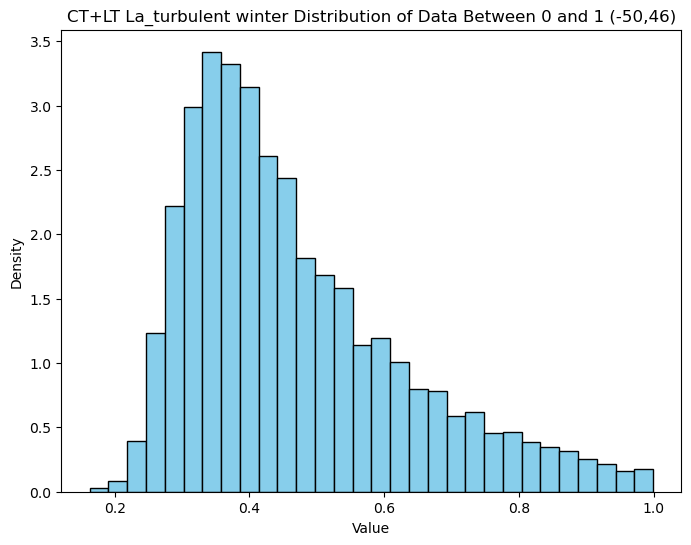

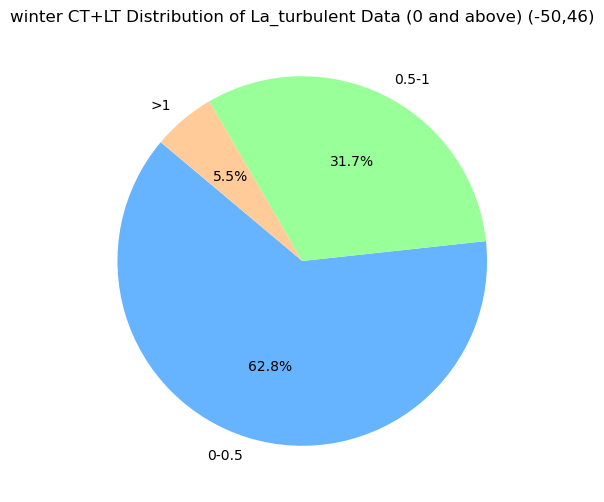

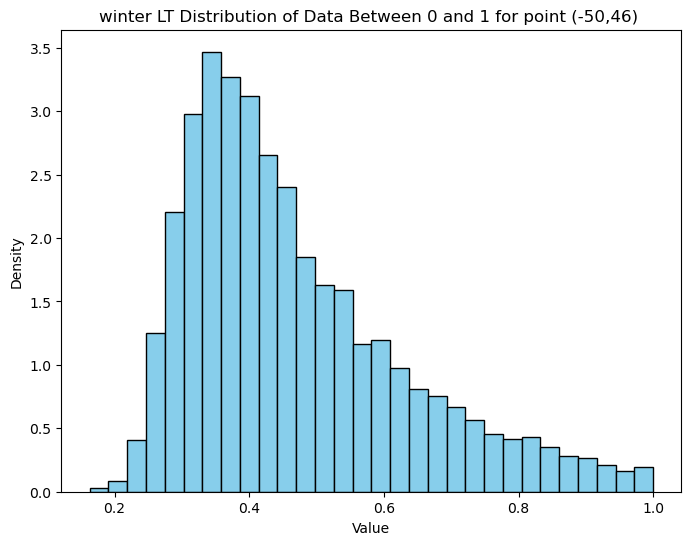

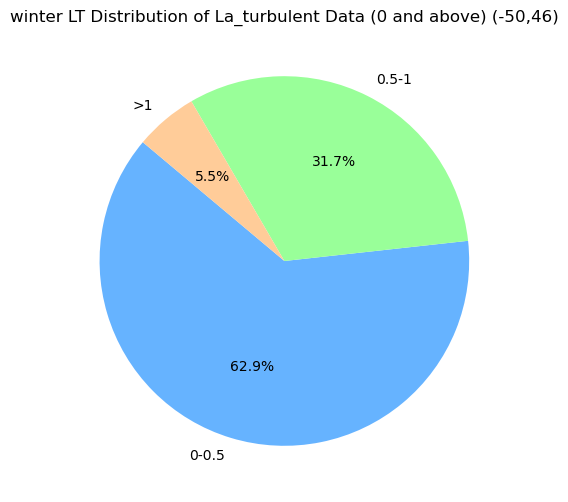

In [7]:
import scipy.stats as stats

def QQplot(test1,test2,test1label,test2label,title_qq,legend,color):
    import pylab
    import numpy as np

    test1=np.array(test1)
    test2=np.array(test2)
    reverse=False
    if len(test1)<len(test2):
        tem=test2
        test2=test1
        test1=tem
        reverse=True
        
    #Calculate quantiles
    test1.sort()
    quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)
    
    test2.sort()
    quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)
    
    #Use the smaller set of quantile levels to create the plot
    quantile_levels = quantile_levels2
    
    #We already have the set of quantiles for the smaller data set
    quantiles2 = test2
    
    #We find the set of quantiles for the larger data set using linear interpolation
    quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)
    
    #Plot the quantiles to create the qq plot
    if reverse==False:
        pylab.plot(quantiles1,quantiles2,color=color,label=legend)
        pylab.xlabel(test1label)
        pylab.ylabel(test2label)
    else:
        pylab.plot(quantiles2,quantiles1,color=color,label=legend)
        pylab.xlabel(test1label)
        pylab.ylabel(test2label)
    
    
    #Add a reference line
    maxval = max(test1[-1],test2[-1])
    minval = min(test1[0],test2[0])
    pylab.plot([minval,maxval],[minval,maxval],'k-')
        # Add the 99.9% line
    p999_test1 = np.percentile(test1, 99.9)
    p999_test2 = np.percentile(test2, 99.9)
    if reverse is False:
        pylab.plot([p999_test1], [p999_test2], 'ro',markersize=3)
    else:
        pylab.plot([p999_test2], [p999_test1], 'ro', markersize=3)

        
    pylab.title(title_qq) 
    pylab.legend(loc='upper left')
def remove_nan(test1):
    test1 = np.array(test1)

    
    # Create a mask for non-NaN values in both arrays
    mask = ~np.isnan(test1)
    
    # Filter the data
    test1_clean = test1[mask]
    
    return test1_clean

# LA_data_6_all=remove_nan(Pcombined_data_6_all['LA'])
# LA_data_6_wave=remove_nan(Pcombined_data_6_wave['LA'])
# LA_MOD_data_6_all=remove_nan(Pcombined_data_6_all['LA_MOD'])
# LA_MOD_data_6_wave=remove_nan(Pcombined_data_6_wave['LA_MOD'])
La_turbulent_data_6_all=remove_nan(Pcombined_data_6_all2['La_turbulent'])
La_turbulent_data_6_wave=remove_nan(Pcombined_data_6_wave2['La_turbulent'])
# S_LA_data_6_all=remove_nan(Psummer_data_6_all['LA'])
# S_LA_data_6_wave=remove_nan(Psummer_data_6_wave['LA'])
# S_LA_MOD_data_6_all=remove_nan(Psummer_data_6_all['LA_MOD'])
# S_LA_MOD_data_6_wave=remove_nan(Psummer_data_6_wave['LA_MOD'])
S_La_turbulent_data_6_all=remove_nan(Psummer_data_6_all2['La_turbulent'])
S_La_turbulent_data_6_wave=remove_nan(Psummer_data_6_wave2['La_turbulent'])


# W_LA_data_6_all=remove_nan(Pwinter_data_6_all['LA'])
# W_LA_data_6_wave=remove_nan(Pwinter_data_6_wave['LA'])
# W_LA_MOD_data_6_all=remove_nan(Pwinter_data_6_all['LA_MOD'])
# W_LA_MOD_data_6_wave=remove_nan(Pwinter_data_6_wave['LA_MOD'])
W_La_turbulent_data_6_all=remove_nan(Pwinter_data_6_all2['La_turbulent'])
W_La_turbulent_data_6_wave=remove_nan(Pwinter_data_6_wave2['La_turbulent'])

data=La_turbulent_data_6_all
total_count = len(data)
point='(-50,46)'
plt.figure(figsize=(8, 6))
filtered_data = La_turbulent_data_6_all[(La_turbulent_data_6_all >= 0) & (La_turbulent_data_6_all <= 1)]
plt.hist(filtered_data, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f'CT+LT La_turbulent winter Distribution of Data Between 0 and 1 {point}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
data = data[data >= 0]

# Count how many data points fall into each category

count_0_5 = np.sum((data >= 0) & (data <= 0.5))
count_5_1 = np.sum((data > 0.5) & (data <= 1))
count_above_1 = np.sum(data > 1)

# Total count of filtered data points
total_count = len(data)

# Calculate percentages
sizes = [

    (count_0_5 / total_count) * 100,
    (count_5_1 / total_count) * 100,
    (count_above_1 / total_count) * 100
]

# Labels for the pie chart
labels = [ '0-0.5', '0.5-1', '>1']

# Colors for each section
colors = [ '#66b3ff', '#99ff99', '#ffcc99']

# Draw the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'winter CT+LT Distribution of La_turbulent Data (0 and above) {point}')
plt.show()



data=La_turbulent_data_6_wave
total_count = len(data)

plt.figure(figsize=(8, 6))
filtered_data = La_turbulent_data_6_wave[(La_turbulent_data_6_wave >= 0) & (La_turbulent_data_6_wave <= 1)]
plt.hist(filtered_data, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f'winter LT Distribution of Data Between 0 and 1 for point {point} ')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

data = data[data >= 0]

# Count how many data points fall into each category

count_0_5 = np.sum((data > 0) & (data <= 0.5))
count_5_1 = np.sum((data > 0.5) & (data <= 1))
count_above_1 = np.sum(data > 1)

# Total count of filtered data points
total_count = len(data)

# Calculate percentages
sizes = [

    (count_0_5 / total_count) * 100,
    (count_5_1 / total_count) * 100,
    (count_above_1 / total_count) * 100
]

# Labels for the pie chart
labels = [ '0-0.5', '0.5-1', '>1']

# Colors for each section
colors = [ '#66b3ff', '#99ff99', '#ffcc99']

# Draw the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'winter LT Distribution of La_turbulent Data (0 and above) {point}')
plt.show()
# QQplot(LA_data_6_all,LA_data_6_wave,'CT+LT','LT','QQ plot of 10years','LA','b')
# QQplot(LA_MOD_data_6_all,LA_MOD_data_6_wave,'CT+LT','LT','QQ plot of 10years','LA_MOD','r')
# QQplot(La_turbulent_data_6_all,La_turbulent_data_6_wave,'CT+LT','LT','QQ plot of 10years','La_turbulent','brown')

# stats.probplot(LA_data_6_all, dist="norm", plot=plt)
# stats.probplot(LA_data_6_wave, dist="norm", plot=plt)
# plt.title('Q-Q Plot of LA CT+LT')
# plt.xlabel('Theoretical Quantiles')
# plt.ylabel('Observed Quantiles')
# plt.xlim(0,1)
# plt.show()


In [ ]:
QQplot(S_LA_data_6_all,S_LA_data_6_wave,'CT+LT','LT','QQ plot of 10years summer','LA','b')
QQplot(S_LA_MOD_data_6_all,S_LA_MOD_data_6_wave,'CT+LT','LT','QQ plot of 10years summer','LA_MOD','r')
QQplot(S_La_turbulent_data_6_all,S_La_turbulent_data_6_wave,'CT+LT','LT','QQ plot of 10years summer','La_turbulent','brown')

In [ ]:
QQplot(W_LA_data_6_all,W_LA_data_6_wave,'CT+LT','LT','QQ plot of 10years winter','LA','b')
QQplot(W_LA_MOD_data_6_all,W_LA_MOD_data_6_wave,'CT+LT','LT','QQ plot of 10years winter','LA_MOD','r')
QQplot(W_La_turbulent_data_6_all,W_La_turbulent_data_6_wave,'CT+LT','LT','QQ plot of 10years winter','La_turbulent','brown')

In [ ]:
MSTAR_LT_data_6_wave=remove_nan(Pcombined_data_6_wave['MSTAR_LT'])
MSTAR_LT_data_6_all=remove_nan(Pcombined_data_6_all['MSTAR_LT'])

S_MSTAR_LT_data_6_wave=remove_nan(Psummer_data_6_wave['MSTAR_LT'])
S_MSTAR_LT_data_6_all=remove_nan(Psummer_data_6_all['MSTAR_LT'])
W_MSTAR_LT_data_6_wave=remove_nan(Pwinter_data_6_wave['MSTAR_LT'])
W_MSTAR_LT_data_6_all=remove_nan(Pwinter_data_6_all['MSTAR_LT'])
QQplot(MSTAR_LT_data_6_all,MSTAR_LT_data_6_wave,'CT+LT','LT','QQ plot of 10years MSTAR_LT','all years','b')
QQplot(S_MSTAR_LT_data_6_all,S_MSTAR_LT_data_6_wave,'CT+LT','LT','QQ plot of 10years MSTAR_LT','summer','r')
QQplot(W_MSTAR_LT_data_6_all,W_MSTAR_LT_data_6_wave,'CT+LT','LT','QQ plot of 10years MSTAR_LT','winter','r')

In [32]:
def read_and_extract_data_b10(pp_root, data_list, variables):

    selected_region = {}
    S_selected_region = {}
    W_selected_region = {}

    for var_name in variables:

        region_masks = []  # To collect the masks where var_name <= 0.5
        region_masks_summer = []  # To collect the masks where var_name <= 0.5
        region_masks_winter = []  # To collect the masks where var_name <= 0.5
        total_mask = None
        S_mask = None
        W_mask = None
        for file_path in data_list:
            file_path = os.path.join(pp_root, file_path)
            if os.path.exists(file_path):
                try:
                    ds = xr.open_dataset(file_path)
                    if var_name in ds:
                        # filtered_data = ds[var_name].where(ds[var_name] <= 0.5, drop=True)
                        # if not filtered_data.isnull().all():
                        #     datasets.append(filtered_data)
                        threshold = ds[var_name].quantile(0.05, dim='time', skipna=True)
                        mask = ds[var_name] <= threshold
                        total_mask = mask.any(dim='time') if total_mask is None else total_mask | mask.any(dim='time')
                        region_masks.append(total_mask)
                        # Summer: June, July, August (JJA)
                        summer = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
                        threshold = summer[var_name].quantile(0.05, dim='time', skipna=True)
                        summer_mask = summer[var_name] <= threshold
                        S_mask = summer_mask.any(dim='time') if S_mask is None else S_mask | summer_mask.any(dim='time')
                        region_masks_summer.append(S_mask)
              

                        # Winter: December, January, February (DJF)
                        winter = ds.sel(time=ds['time'].dt.month.isin([12, 1, 2]))
                        threshold =  winter[var_name].quantile(0.05, dim='time', skipna=True)
                        winter_mask =  winter[var_name] <= threshold
                        W_mask = winter_mask.any(dim='time') if W_mask is None else W_mask | winter_mask.any(dim='time')
                        region_masks_winter.append(W_mask)
                    else:
                        print(f"Variable {var_name} not found in {file_path}")
                    ds.close()

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")
                
        if region_masks:
            selected_region[var_name] = xr.concat(region_masks, dim='time').any(dim='time')
        else:
            selected_region[var_name] = None
            
        if region_masks_summer:
            S_selected_region[var_name] = xr.concat(region_masks_summer, dim='time').any(dim='time')
        else:
            S_selected_region[var_name] = None
            
        if region_masks_winter:
            W_selected_region[var_name] = xr.concat(region_masks_winter, dim='time').any(dim='time')
        else:
            W_selected_region[var_name] = None
        # Combine along time dimension after the loop finishes
        # combined_data[var_name] = xr.concat(datasets, dim='time') if datasets else None
        # summer_data[var_name] = xr.concat(summer_data_list, dim='time') if summer_data_list else None
        # winter_data[var_name] = xr.concat(winter_data_list, dim='time') if winter_data_list else None
    return selected_region, S_selected_region, W_selected_region

variables_daily = ['LA','LA_MOD','La_turbulent']
Bcombined_data_6_wave, Bsummer_data_6_wave, Bwinter_data_6_wave = read_and_extract_data_b10(pp_root_6_wave, WDdata_list, variables_daily)
# combined_data_6_wave, summer_data_6_wave, winter_data_6_wave = read_and_extract_data(pp_root_6_wave, WMdata_list, variables_month)

Bcombined_data_6_all, Bsummer_data_6_all, Bwinter_data_6_all = read_and_extract_data_b10(pp_root_6_all, WDdata_list, variables_daily)
# combined_data_6_all, summer_data_6_all, winter_data_6_all = read_and_extract_data(pp_root_6_all, WMdata_list, variables_month)



/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/Qian.Xiao/miniconda3/envs/mom6py/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning:

In [45]:
Pcombined_data_6_all['LA']

<xarray.DataArray 'LA' (time: 4017)>
array([1.1492560e+04, 5.3979218e-01, 4.2273539e-01, ..., 7.2288543e-01,
       1.3183764e+00, 6.9481152e-01], dtype=float32)
Coordinates:
    xh       float64 -68.0
    yh       float64 38.49
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2003-12-31T12:00:00
Attributes:
    units:          nondim
    long_name:      Langmuir number.
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT

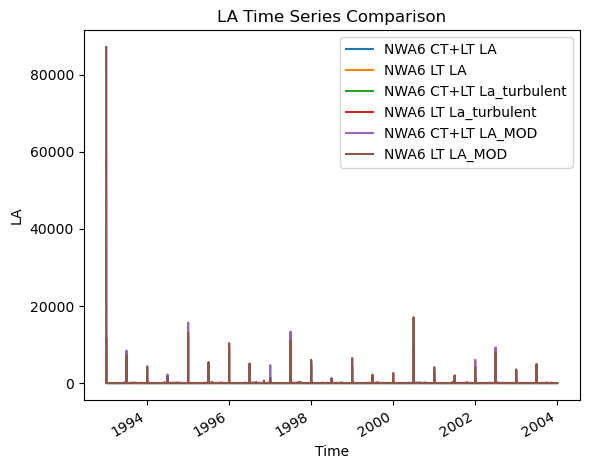

<Figure size 640x480 with 0 Axes>

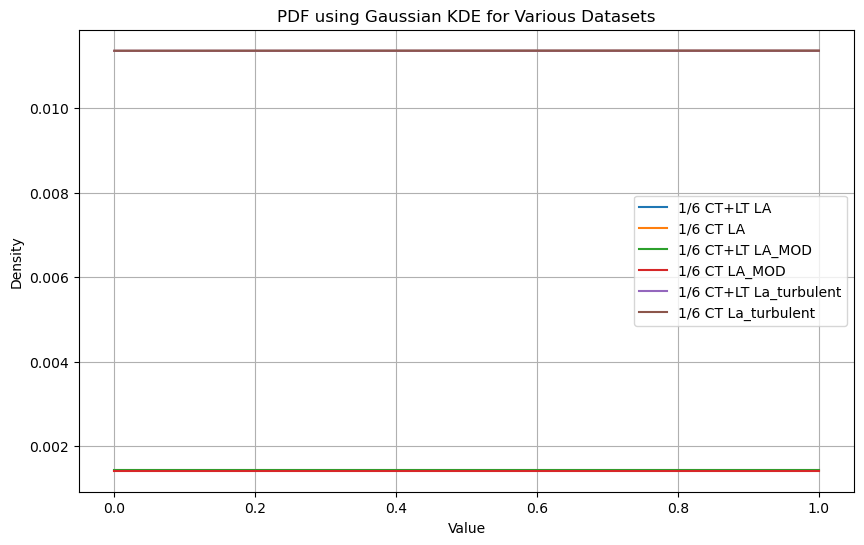

In [49]:
plt.figure()
Pcombined_data_6_all['LA'].plot(label='NWA6 CT+LT LA')
Pcombined_data_6_wave['LA'].plot(label='NWA6 LT LA')
Pcombined_data_6_all['La_turbulent'].plot(label='NWA6 CT+LT La_turbulent')
Pcombined_data_6_wave['La_turbulent'].plot(label='NWA6 LT La_turbulent')
Pcombined_data_6_all['LA_MOD'].plot(label='NWA6 CT+LT LA_MOD')
Pcombined_data_6_wave['LA_MOD'].plot(label='NWA6 LT LA_MOD')
# Add title, labels, and legend
plt.title('LA Time Series Comparison')
plt.xlabel('Time')
plt.ylabel('LA')
plt.legend()
plt.show()
plt.figure()


###do statistically analysis for this point



# List of datasets and labels
# List of datasets and labels
datasets = [
    ("1/6 CT+LT LA", Pcombined_data_6_all['LA']),
    ("1/6 CT LA", Pcombined_data_6_wave['LA']),
    ("1/6 CT+LT LA_MOD", Pcombined_data_6_all['LA_MOD']),
    ("1/6 CT LA_MOD", Pcombined_data_6_wave['LA_MOD']),
    ("1/6 CT+LT La_turbulent", Pcombined_data_6_all['La_turbulent']),
    ("1/6 CT La_turbulent", Pcombined_data_6_wave['La_turbulent']),
]

plt.figure(figsize=(10, 6))

# Plot PDF for each dataset with line only using scipy's gaussian_kde
for label, data in datasets:
    kde = gaussian_kde(data)  # Fit KDE
    x = np.linspace(0, 1, 1000)  # Points to evaluate the PDF
    plt.plot(x, kde(x), label=label)  # Plot the line

plt.title("PDF using Gaussian KDE for Various Datasets")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

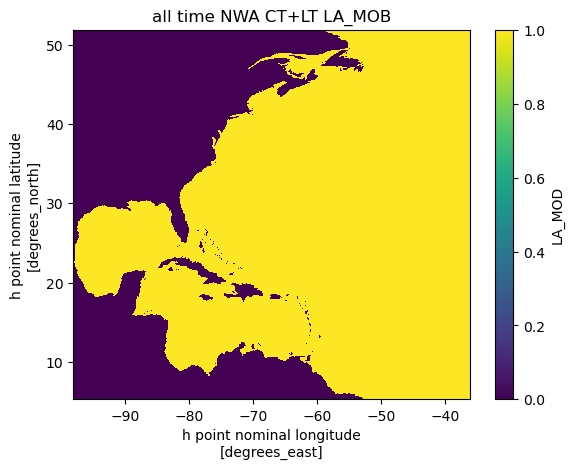

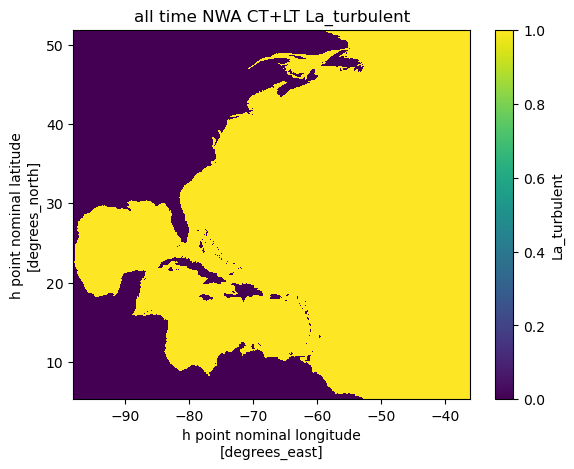

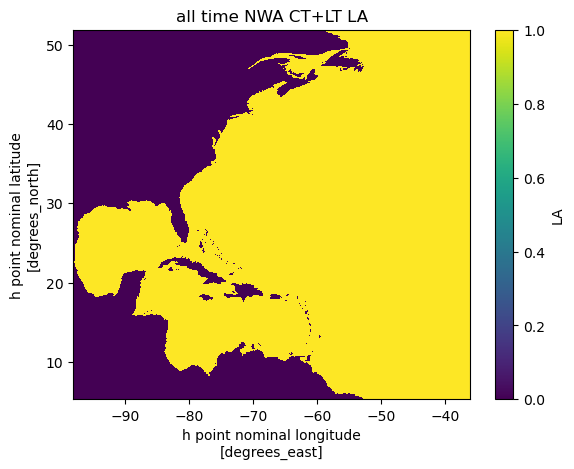

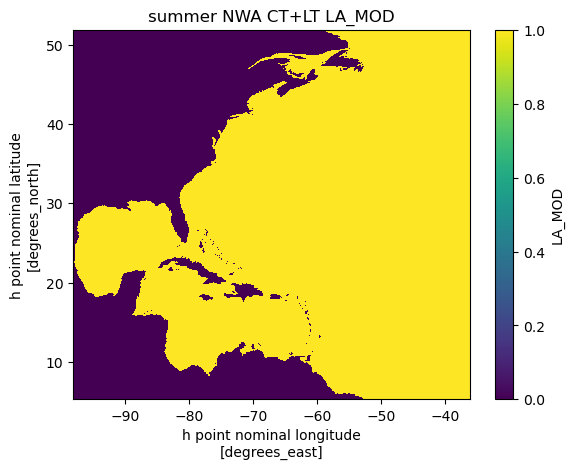

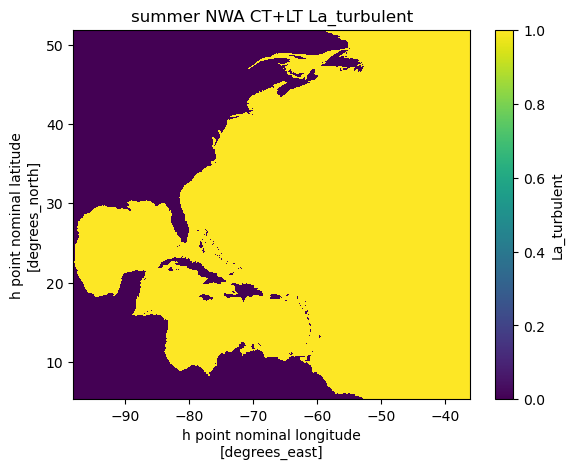

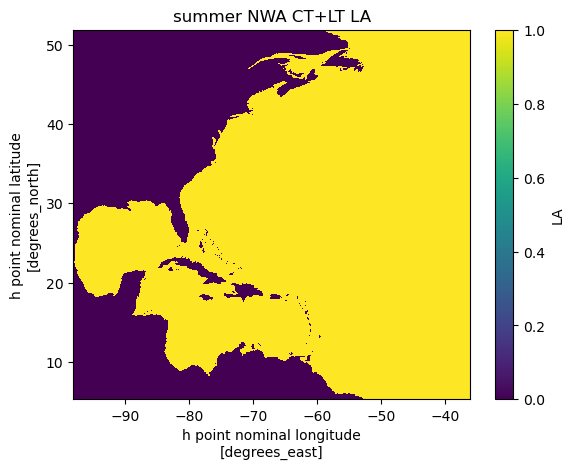

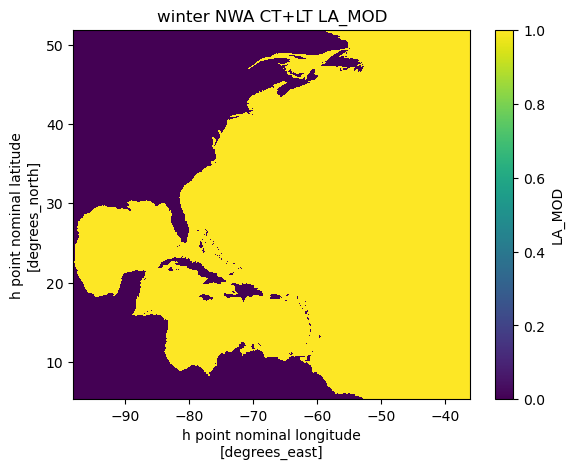

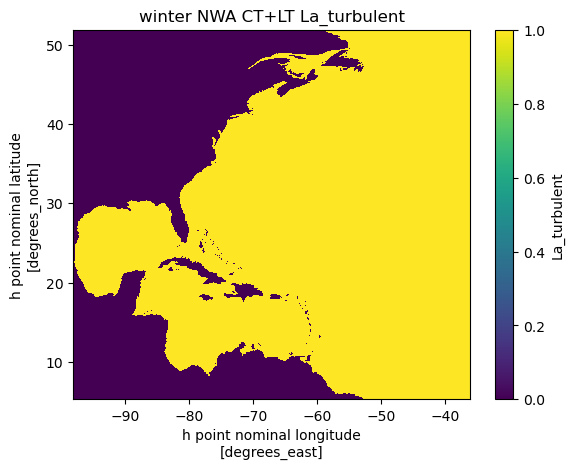

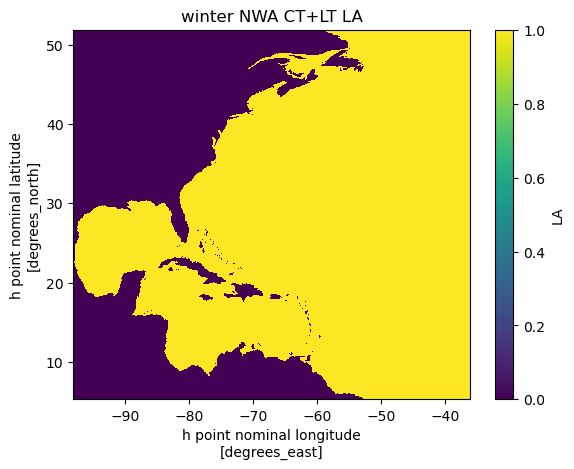

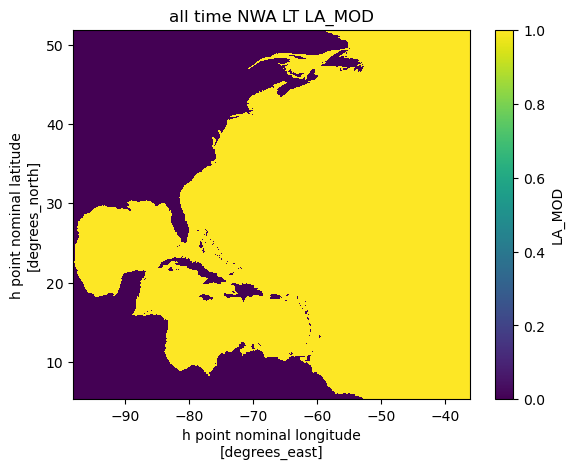

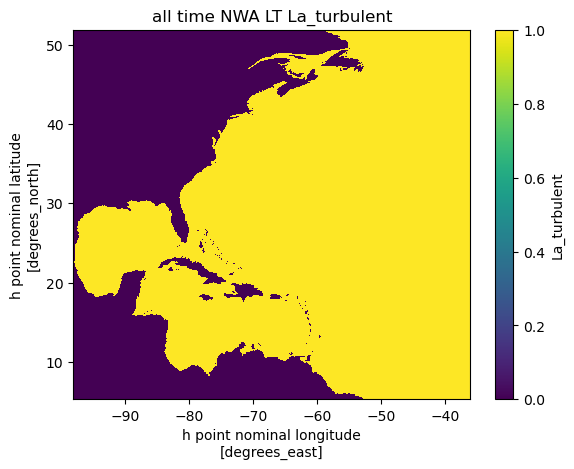

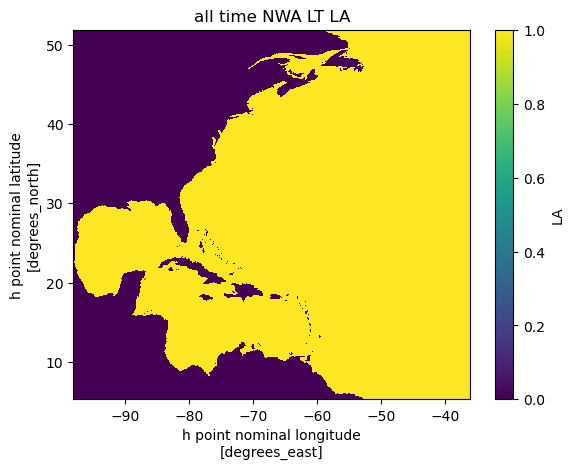

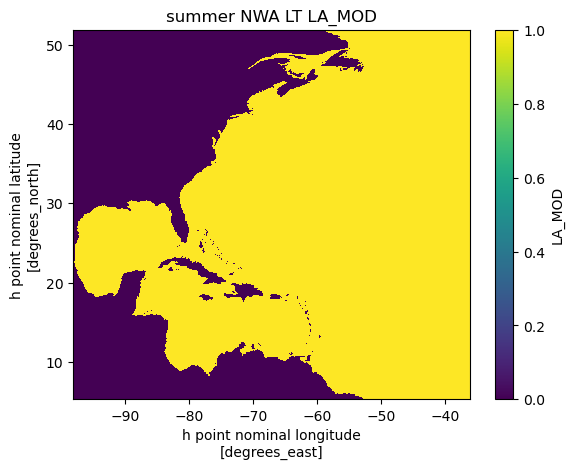

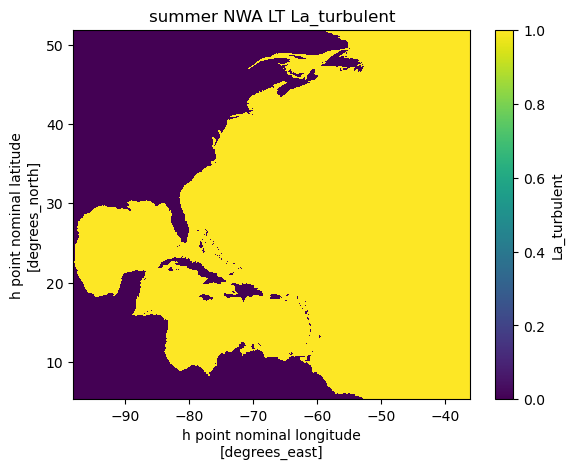

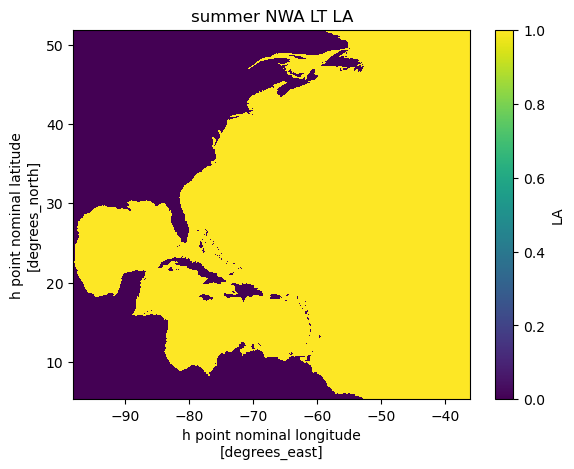

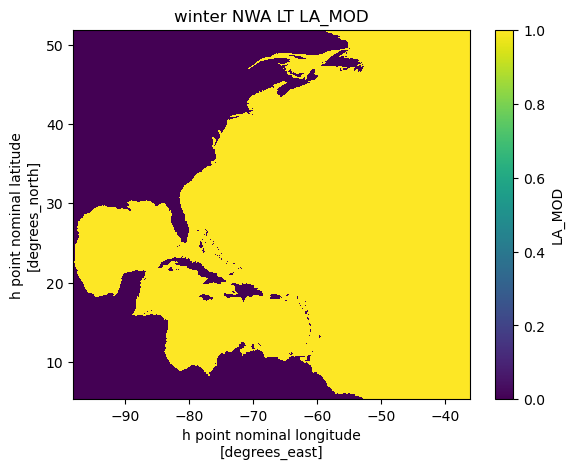

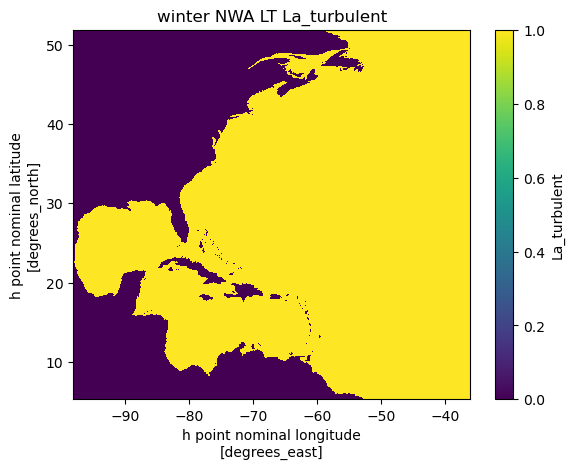

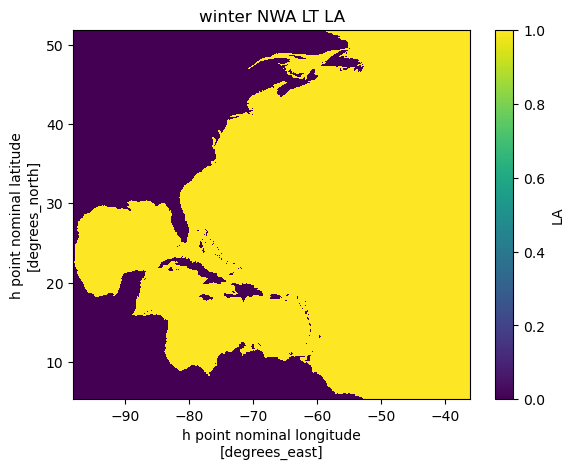

In [33]:
plt.figure
Bcombined_data_6_all['LA_MOD'].plot()
plt.title('all time NWA CT+LT LA_MOD')
plt.show()
plt.figure
Bcombined_data_6_all['La_turbulent'].plot()
plt.title('all time NWA CT+LT La_turbulent')
plt.show()
plt.figure
Bcombined_data_6_all['LA'].plot()
plt.title('all time NWA CT+LT LA')
plt.show()
plt.figure
Bsummer_data_6_all['LA_MOD'].plot()
plt.title('summer NWA CT+LT LA_MOD')
plt.show()
plt.figure
Bsummer_data_6_all['La_turbulent'].plot()
plt.title('summer NWA CT+LT La_turbulent')
plt.show()
plt.figure
Bsummer_data_6_all['LA'].plot()
plt.title('summer NWA CT+LT LA')
plt.show()
Bwinter_data_6_all['LA_MOD'].plot()
plt.title('winter NWA CT+LT LA_MOD')
plt.show()
plt.figure
Bwinter_data_6_all['La_turbulent'].plot()
plt.title('winter NWA CT+LT La_turbulent')
plt.show()
plt.figure
Bwinter_data_6_all['LA'].plot()
plt.title('winter NWA CT+LT LA')
plt.show()





plt.figure
Bcombined_data_6_wave['LA_MOD'].plot()
plt.title('all time NWA LT LA_MOD')
plt.show()
plt.figure
Bcombined_data_6_wave['La_turbulent'].plot()
plt.title('all time NWA LT La_turbulent')
plt.show()
plt.figure
Bcombined_data_6_wave['LA'].plot()
plt.title('all time NWA LT LA')
plt.show()
plt.figure
Bsummer_data_6_wave['LA_MOD'].plot()
plt.title('summer NWA LT LA_MOD')
plt.show()
plt.figure
Bsummer_data_6_wave['La_turbulent'].plot()
plt.title('summer NWA LT La_turbulent')
plt.show()
plt.figure
Bsummer_data_6_wave['LA'].plot()
plt.title('summer NWA LT LA')
plt.show()
Bwinter_data_6_wave['LA_MOD'].plot()
plt.title('winter NWA LT LA_MOD')
plt.show()
plt.figure
Bwinter_data_6_wave['La_turbulent'].plot()
plt.title('winter NWA LT La_turbulent')
plt.show()
plt.figure
Bwinter_data_6_wave['LA'].plot()
plt.title('winter NWA LT LA')
plt.show()

In [37]:
WDdata_list = [
    '19930101_results/19930101.ocean_daily.nc',
    '19930701_results/19930701.ocean_daily.nc',
    '19940101_results/19940101.ocean_daily.nc',
    '19940701_results/19940701.ocean_daily.nc',
    '19950101_results/19950101.ocean_daily.nc',
    '19950701_results/19950701.ocean_daily.nc',
    '19960101_results/19960101.ocean_daily.nc',
    '19960701_results/19960701.ocean_daily.nc',
    '19970101_results/19970101.ocean_daily.nc',
    '19970701_results/19970701.ocean_daily.nc',
    '19980101_results/19980101.ocean_daily.nc',
    '19980701_results/19980701.ocean_daily.nc',
    '19990101_results/19990101.ocean_daily.nc',
    '19990701_results/19990701.ocean_daily.nc',
    '20000101_results/20000101.ocean_daily.nc',
    '20000701_results/20000701.ocean_daily.nc',
    '20010101_results/20010101.ocean_daily.nc',
    '20010701_results/20010701.ocean_daily.nc',
    '20020101_results/20020101.ocean_daily.nc',
    '20020701_results/20020701.ocean_daily.nc',
    '20030101_results/20030101.ocean_daily.nc',
    '20030701_results/20030701.ocean_daily.nc',
]
def read_and_extract_data_l5C(pp_root, data_list, variables):

    top_10_percent_count = {}
    S_top_10_percent_count = {}
    W_top_10_percent_count = {}

    for var_name in variables:
     
        below_threshold_count = None
        S_below_threshold_count = None
        W_below_threshold_count = None

        for file_path in data_list:
            file_path = os.path.join(pp_root, file_path)
            if os.path.exists(file_path):
                try:
                    ds = xr.open_dataset(file_path)
                    if var_name in ds:
                        
                        below_threshold = (ds[var_name] <= 0.5)
                        count = below_threshold.sum(dim='time')
                        if below_threshold_count is None:
                            below_threshold_count = count
                        else:
                            below_threshold_count += count
                            
     
                        # Summer: June, July, August (JJA)
                        summer = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
                        S_below_threshold = (summer[var_name] <= 0.5)
                        S_count = S_below_threshold.sum(dim='time')
                        if S_below_threshold_count is None:
                            S_below_threshold_count = S_count
                        else:
                            S_below_threshold_count += S_count
                 

                        # Winter: December, January, February (DJF)
                        winter = ds.sel(time=ds['time'].dt.month.isin([12, 1, 2]))
                        W_below_threshold = (winter[var_name] <= 0.5)
                        W_count = W_below_threshold.sum(dim='time')
                        if W_below_threshold_count is None:
                            W_below_threshold_count = W_count
                        else:
                            W_below_threshold_count += W_count

                    else:
                        print(f"Variable {var_name} not found in {file_path}")
                    ds.close()

                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
            else:
                print(f"File not found: {file_path}")

            
        if below_threshold_count is not None:
            # Flatten and get the top 10% most frequent occurrences
            flat_count = below_threshold_count.values.flatten()
            threshold = np.percentile(flat_count[flat_count > 0], 90)
            top_10_percent = (below_threshold_count >= threshold)
            top_10_percent_count[var_name] = top_10_percent
            
        if S_below_threshold_count is not None:
            # Flatten and get the top 10% most frequent occurrences
            S_flat_count = S_below_threshold_count.values.flatten()
            S_threshold = np.percentile(S_flat_count[S_flat_count > 0], 90)
            S_top_10_percent = (S_below_threshold_count >= S_threshold)
            S_top_10_percent_count[var_name] = S_top_10_percent

        if W_below_threshold_count is not None:
            # Flatten and get the top 10% most frequent occurrences
            W_flat_count = W_below_threshold_count.values.flatten()
            W_threshold = np.percentile(W_flat_count[W_flat_count > 0], 90)
            W_top_10_percent = (W_below_threshold_count >= W_threshold)
            W_top_10_percent_count[var_name] = W_top_10_percent

    return top_10_percent_count,S_top_10_percent_count,W_top_10_percent_count
Lcombined_data_6_wave, Lsummer_data_6_wave, Lwinter_data_6_wave = read_and_extract_data_l5C(pp_root_6_wave, WDdata_list, variables_daily)
# combined_data_6_wave, summer_data_6_wave, winter_data_6_wave = read_and_extract_data(pp_root_6_wave, WMdata_list, variables_month)

Lcombined_data_6_all, Lsummer_data_6_all, Lwinter_data_6_all = read_and_extract_data_l5C(pp_root_6_all, WDdata_list, variables_daily)
# combined_data_6_all, summer_data_6_all, winter_data_6_all = read_and_extract_data(pp_root_6_all, WMdata_list, variables_month)


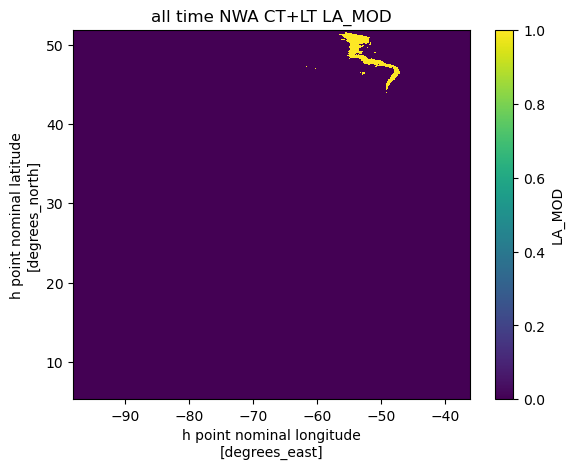

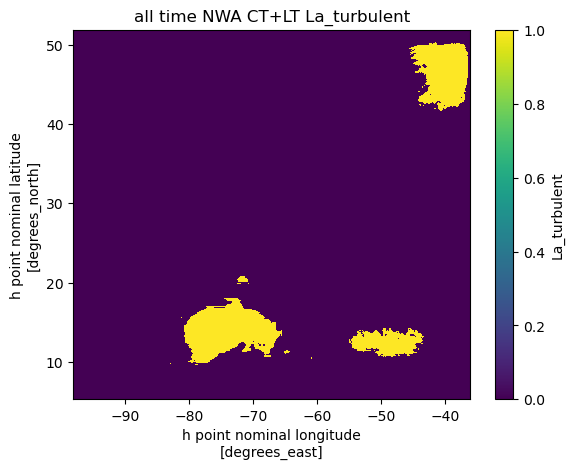

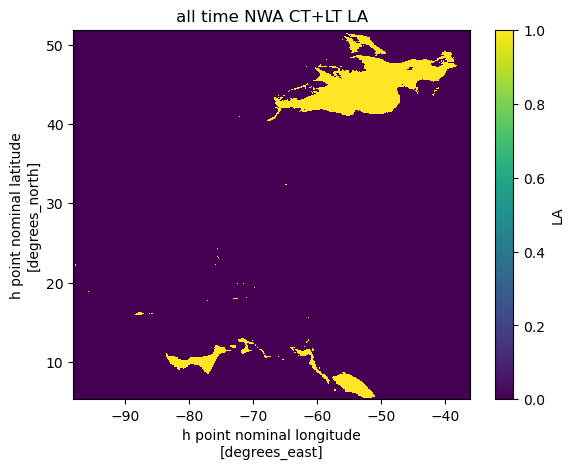

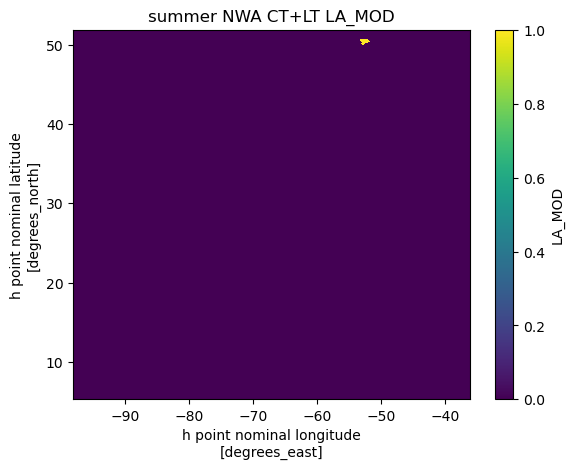

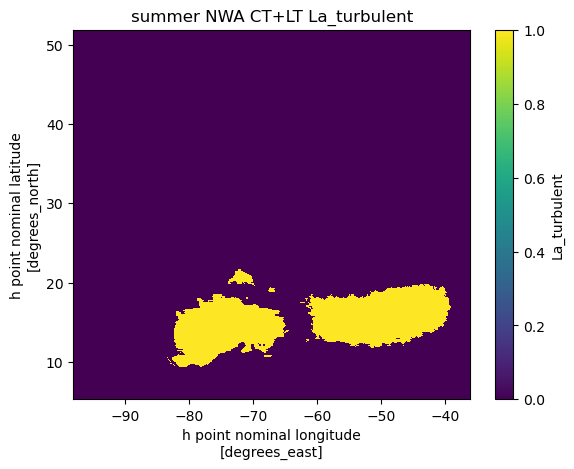

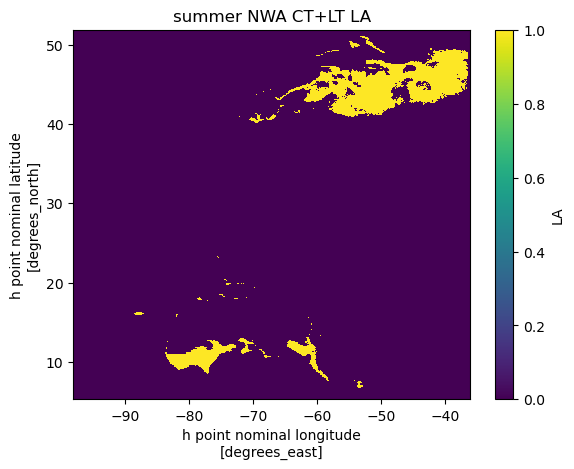

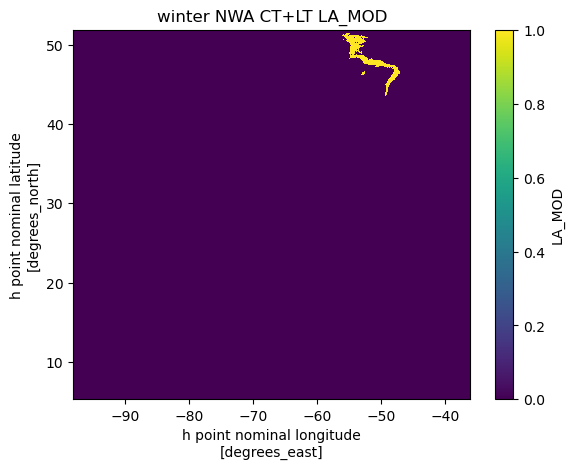

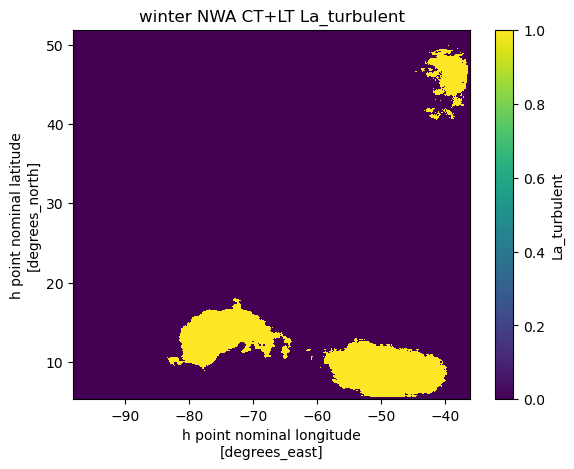

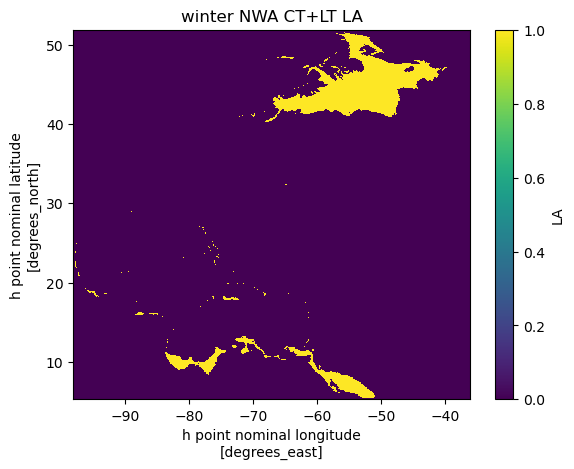

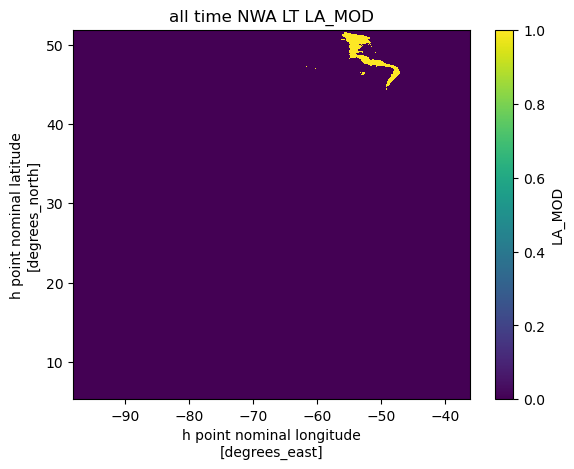

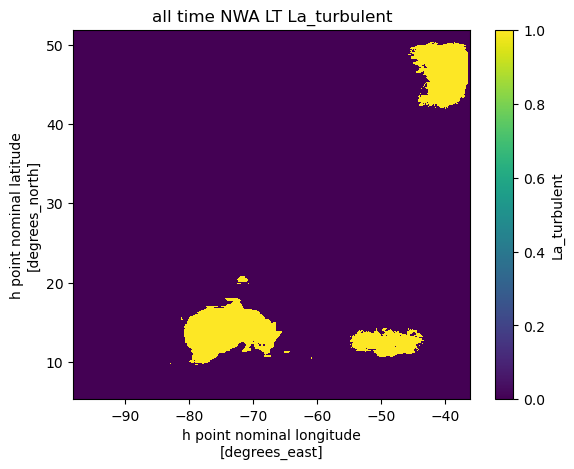

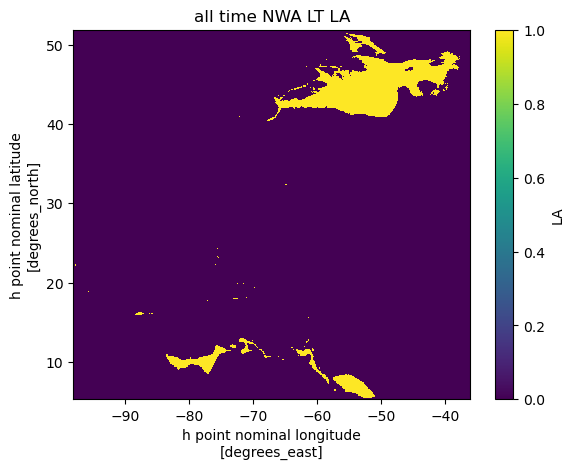

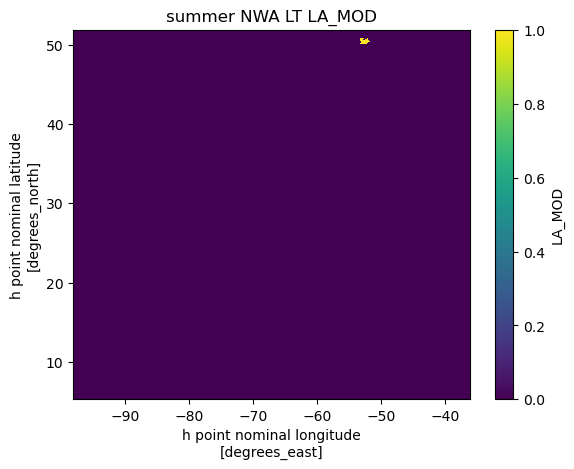

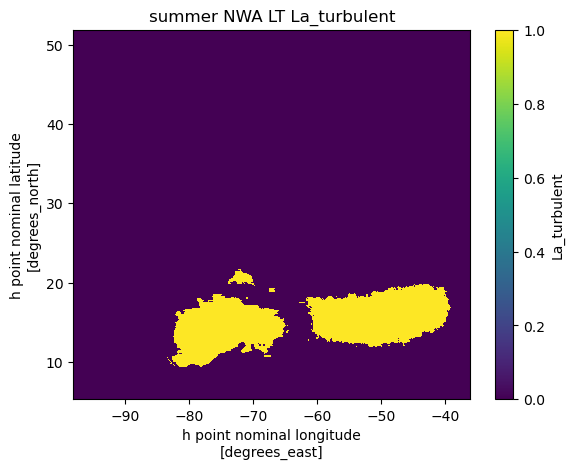

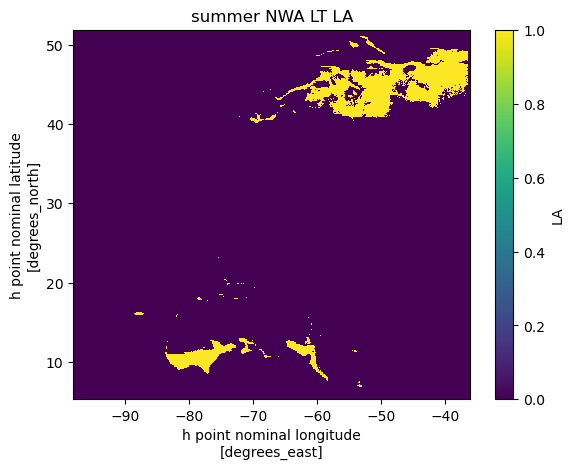

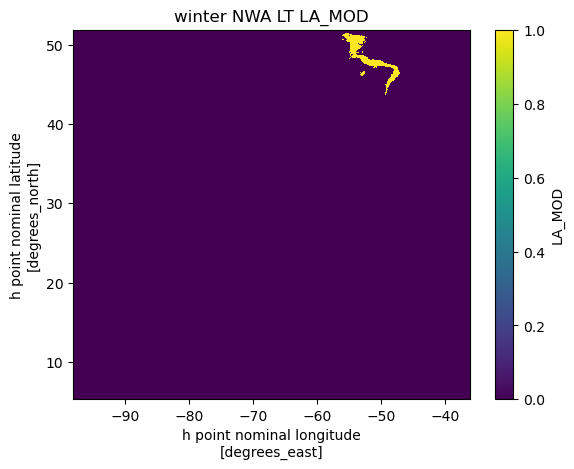

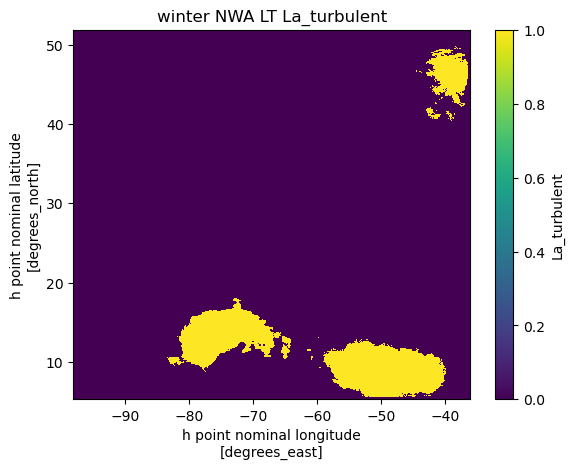

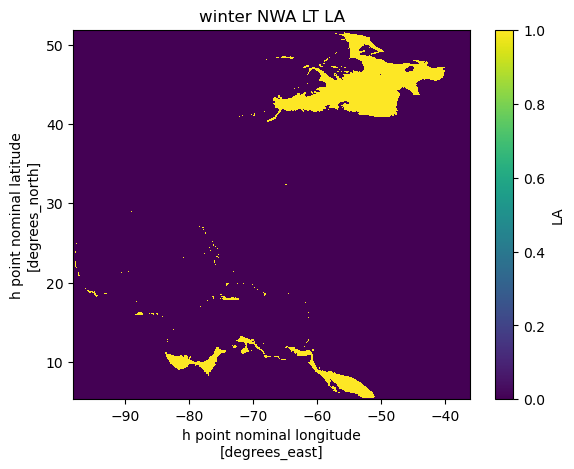

In [38]:
plt.figure
Lcombined_data_6_all['LA_MOD'].plot()
plt.title('all time NWA CT+LT LA_MOD')
plt.show()
plt.figure
Lcombined_data_6_all['La_turbulent'].plot()
plt.title('all time NWA CT+LT La_turbulent')
plt.show()
plt.figure
Lcombined_data_6_all['LA'].plot()
plt.title('all time NWA CT+LT LA')
plt.show()
plt.figure
Lsummer_data_6_all['LA_MOD'].plot()
plt.title('summer NWA CT+LT LA_MOD')
plt.show()
plt.figure
Lsummer_data_6_all['La_turbulent'].plot()
plt.title('summer NWA CT+LT La_turbulent')
plt.show()
plt.figure
Lsummer_data_6_all['LA'].plot()
plt.title('summer NWA CT+LT LA')
plt.show()
Lwinter_data_6_all['LA_MOD'].plot()
plt.title('winter NWA CT+LT LA_MOD')
plt.show()
plt.figure
Lwinter_data_6_all['La_turbulent'].plot()
plt.title('winter NWA CT+LT La_turbulent')
plt.show()
plt.figure
Lwinter_data_6_all['LA'].plot()
plt.title('winter NWA CT+LT LA')
plt.show()





plt.figure
Lcombined_data_6_wave['LA_MOD'].plot()
plt.title('all time NWA LT LA_MOD')
plt.show()
plt.figure
Lcombined_data_6_wave['La_turbulent'].plot()
plt.title('all time NWA LT La_turbulent')
plt.show()
plt.figure
Lcombined_data_6_wave['LA'].plot()
plt.title('all time NWA LT LA')
plt.show()
plt.figure
Lsummer_data_6_wave['LA_MOD'].plot()
plt.title('summer NWA LT LA_MOD')
plt.show()
plt.figure
Lsummer_data_6_wave['La_turbulent'].plot()
plt.title('summer NWA LT La_turbulent')
plt.show()
plt.figure
Lsummer_data_6_wave['LA'].plot()
plt.title('summer NWA LT LA')
plt.show()
Lwinter_data_6_wave['LA_MOD'].plot()
plt.title('winter NWA LT LA_MOD')
plt.show()
plt.figure
Lwinter_data_6_wave['La_turbulent'].plot()
plt.title('winter NWA LT La_turbulent')
plt.show()
plt.figure
Lwinter_data_6_wave['LA'].plot()
plt.title('winter NWA LT LA')
plt.show()